# **Loan Default Prediction**

## **Problem Definition**

### **The Context:**

 - ***Why is this problem important to solve?***
 
   - **Effective Financial Risk Management: By accurately predicting loan defaults, banks can minimize the risks associated with lending to borrowers who may default. This helps banks maintain a healthy loan portfolio and prevents significant financial losses.**

   - **Optimized Resource Allocation: Identifying potential defaulters allows banks to allocate their resources more effectively, focusing on lending to creditworthy borrowers and avoiding the time and effort required to recover bad loans.**

   - **Regulatory Compliance: Banks must adhere to various regulations that mandate maintaining a certain level of reserve capital to cover potential losses from bad loans. Precise default forecasts can help banks comply with these regulations and avoid fines or operational restrictions.**

   - **Promoting Fair Lending Practices: Developing an unbiased and data-driven loan approval process ensures that all applicants are treated equitably and fairly, regardless of their background. This approach aligns with the Equal Credit Opportunity Act guidelines and encourages responsible and ethical lending practices.**

   - **Enhancing Customer Service Quality: By accurately identifying creditworthy borrowers, banks can offer these customers competitive loan products and interest rates, leading to superior customer service and increased customer satisfaction.**

   - **Gaining a Competitive Advantage: Accurate loan default prediction models provide banks with a competitive edge in the marketplace, as they can optimize their lending practices, reduce losses, and offer better loan products to their customers.**

### **The objective:**

 - ***What is the intended goal?***
   - **The intended goal of the objective is to build a classification model to predict clients who are likely to default on their loans. By achieving this goal, the bank can make more informed decisions when approving loans, taking into account the important features that contribute to loan default risk. This will help the bank minimize financial risks, allocate resources more efficiently, ensure regulatory compliance, promote fair lending practices, improve customer service quality, and gain a competitive advantage in the market.**

### **The key questions:**

- ***What are the key questions that need to be answered?***
  - **Which features are the most important in determining the likelihood of a loan default?**
  - **How can the model's performance be optimized in terms of accuracy, precision, and recall to ensure reliable predictions?**
  - **How interpretable is the model, and can it provide a clear justification for its predictions, especially in cases of loan rejections?**
  - **How can the bank regularly update and maintain the model to ensure its continued relevance and accuracy in predicting loan defaults as economic conditions and borrower profiles change over time?**


### **The problem formulation**:

- ***What is it that we are trying to solve using data science?***
   - **Using data science, we are trying to solve the problem of predicting loan defaults by building a classification model that accurately identifies borrowers who are likely to default on their loans. This model aims to analyze various features of loan applicants and their credit profiles to determine the potential risk of default. By doing so, the bank can make more informed decisions during the loan approval process, minimize financial risks, ensure fair lending practices, comply with regulatory requirements, and improve overall operational efficiency. The data-driven model will help the bank to better allocate resources, offer competitive loan products, and enhance customer satisfaction.**

## **Data Description:**
The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 12 input variables were registered for each applicant.


* **BAD:** 1 = Client defaulted on loan, 0 = loan repaid

* **LOAN:** Amount of loan approved.

* **MORTDUE:** Amount due on the existing mortgage.

* **VALUE:** Current value of the property. 

* **REASON:** Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts) 

* **JOB:** The type of job that loan applicant has such as manager, self, etc.

* **YOJ:** Years at present job.

* **DEROG:** Number of major derogatory reports (which indicates a serious delinquency or late payments). 

* **DELINQ:** Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due). 

* **CLAGE:** Age of the oldest credit line in months. 

* **NINQ:** Number of recent credit inquiries. 

* **CLNO:** Number of existing credit lines.

* **DEBTINC:** Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

## Import the necessary libraries and Data

In [1]:
import warnings
warnings.filterwarnings("ignore")

# Libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree


# Scalers for normalization data
from sklearn.preprocessing import MinMaxScaler

# Splitting data into train and test
from sklearn.model_selection import train_test_split

# Algorithms to use
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
import lightgbm as lgb
from sklearn.neighbors import KNeighborsClassifier


# Metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, recall_score, precision_score, accuracy_score
from sklearn.metrics import precision_recall_curve


# For hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import recall_score, make_scorer
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.impute import KNNImputer
import scipy.stats as stats


In [2]:
learn = pd.read_csv("hmeq.csv")

In [125]:
# Copying data to another variable to avoid any changes to the original data
data = learn.copy()

## Data Overview

- Reading the dataset
- Understanding the shape of the dataset
- Checking the data types
- Checking for missing values
- Checking for duplicated values

In [126]:
data.head()

BAD  LOAN  MORTDUE     VALUE   REASON     JOB   YOJ  DEROG  DELINQ  \
0    1  1100  25860.0   39025.0  HomeImp   Other  10.5    0.0     0.0   
1    1  1300  70053.0   68400.0  HomeImp   Other   7.0    0.0     2.0   
2    1  1500  13500.0   16700.0  HomeImp   Other   4.0    0.0     0.0   
3    1  1500      NaN       NaN      NaN     NaN   NaN    NaN     NaN   
4    0  1700  97800.0  112000.0  HomeImp  Office   3.0    0.0     0.0   

        CLAGE  NINQ  CLNO  DEBTINC  
0   94.366667   1.0   9.0      NaN  
1  121.833333   0.0  14.0      NaN  
2  149.466667   1.0  10.0      NaN  
3         NaN   NaN   NaN      NaN  
4   93.333333   0.0  14.0      NaN

In [127]:
data.tail()

BAD   LOAN  MORTDUE    VALUE   REASON    JOB   YOJ  DEROG  DELINQ  \
5955    0  88900  57264.0  90185.0  DebtCon  Other  16.0    0.0     0.0   
5956    0  89000  54576.0  92937.0  DebtCon  Other  16.0    0.0     0.0   
5957    0  89200  54045.0  92924.0  DebtCon  Other  15.0    0.0     0.0   
5958    0  89800  50370.0  91861.0  DebtCon  Other  14.0    0.0     0.0   
5959    0  89900  48811.0  88934.0  DebtCon  Other  15.0    0.0     0.0   

           CLAGE  NINQ  CLNO    DEBTINC  
5955  221.808718   0.0  16.0  36.112347  
5956  208.692070   0.0  15.0  35.859971  
5957  212.279697   0.0  15.0  35.556590  
5958  213.892709   0.0  16.0  34.340882  
5959  219.601002   0.0  16.0  34.571519

In [128]:
data.shape

(5960, 13)

In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [130]:
# Checking for duplicate values
data.duplicated().sum()

0

In [131]:
# Checking for any missing values just in case
data.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [132]:
# Making a list of all categorical variables
cat_col = list(data.select_dtypes("object").columns)
print(cat_col)

['REASON', 'JOB']


In [133]:
# Making a list of all categorical variables
num_col = list(data.select_dtypes(include=["int64", "float64"]).columns)
print(num_col)

['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']


## Summary Statistics

In [134]:
data[num_col].describe().T

count           mean           std          min           25%  \
BAD      5960.0       0.199497      0.399656     0.000000      0.000000   
LOAN     5960.0   18607.969799  11207.480417  1100.000000  11100.000000   
MORTDUE  5442.0   73760.817200  44457.609458  2063.000000  46276.000000   
VALUE    5848.0  101776.048741  57385.775334  8000.000000  66075.500000   
YOJ      5445.0       8.922268      7.573982     0.000000      3.000000   
DEROG    5252.0       0.254570      0.846047     0.000000      0.000000   
DELINQ   5380.0       0.449442      1.127266     0.000000      0.000000   
CLAGE    5652.0     179.766275     85.810092     0.000000    115.116702   
NINQ     5450.0       1.186055      1.728675     0.000000      0.000000   
CLNO     5738.0      21.296096     10.138933     0.000000     15.000000   
DEBTINC  4693.0      33.779915      8.601746     0.524499     29.140031   

                  50%            75%            max  
BAD          0.000000       0.000000       1.000000  
LOAN     16300.000000   23300.000000   89900.000000  
MORTDUE  65019.000000   91488.000000  399550.000000  
VALUE    89235.500000  119824.250000  855909.000000  
YOJ          7.000000      13.000000      41.000000  
DEROG        0.000000       0.000000      10.000000  
DELINQ       0.000000       0.000000      15.000000  
CLAGE      173.466667     231.562278    1168.233561  
NINQ         1.000000       2.000000      17.000000  
CLNO        20.000000      26.000000      71.000000  
DEBTINC     34.818262      39.003141     203.312149

# Observations from Summary Statistics
  - **There are 5960 observations in the dataset.**
  - **The BAD variable is a binary variable indicating whether the loan is bad (1) or not (0).**
  - **The LOAN variable has a minimum value of 1100 and a maximum value of 89900 with a mean of 18607.97 and a standard deviation of 11207.48. The distribution of LOAN appears to be positively skewed with a higher concentration of values towards the lower end of the range. The median for the LOAN variable is 16300, which means that half of the loans in the dataset have a loan amount less than or equal to 16300.**
  - **The MORTDUE variable has a minimum value of 2063 and a maximum value of 399550 with a mean of 73760.81 and a standard deviation of 44457.61. The distribution of MORTDUE also appears to be positively skewed with a higher concentration of values towards the lower end of the range. The median for the MORTDUE variable is 65019, which means that half of the loans in the dataset have a mortgage due amount less than or equal to 65019.**
  - **The VALUE variable has a minimum value of 8000 and a maximum value of 855909 with a mean of 101776.05 and a standard deviation of 57385.78. The distribution of VALUE also appears to be positively skewed with a higher concentration of values towards the lower end of the range. The median for the VALUE variable is 89235.5, which means that half of the loans in the dataset have a property value less than or equal to 89235.5.**
  - **The YOJ variable has a minimum value of 0 and a maximum value of 41 with a mean of 8.92 and a standard deviation of 7.57. The distribution of YOJ appears to be positively skewed with a higher concentration of values towards the lower end of the range. The median for the YOJ variable is 7, which means that half of the borrowers in the dataset have a job tenure of less than or equal to 7 years.** 
  - **The DEROG variable has a minimum value of 0 and a maximum value of 10 with a mean of 0.25 and a standard deviation of 0.85. The distribution of DEROG appears to be positively skewed with a higher concentration of values towards the lower end of the range. The median for the DEROG variable is 0, which indicates that the majority of borrowers in the dataset have no derogatory marks on their credit report.**
  - **The DELINQ variable has a minimum value of 0 and a maximum value of 15 with a mean of 0.45 and a standard deviation of 1.13. The distribution of DELINQ also appears to be positively skewed with a higher concentration of values towards the lower end of the range. The median for the DELINQ variable is 0, which indicates that the majority of borrowers in the dataset have no delinquencies on their credit report.**
  - **The CLAGE variable has a minimum value of 0 and a maximum value of 1168.23 with a mean of 179.77 and a standard deviation of 85.81. The distribution of CLAGE appears to be positively skewed with a higher concentration of values towards the lower end of the range. The median for the CLAGE variable is 173.47, which means that half of the borrowers in the dataset have a credit age less than or equal to 173.47 months (or approximately 14 years).**
  - **he NINQ variable has a minimum value of 0 and a maximum value of 17 with a mean of 1.19 and a standard deviation of 1.73. The distribution of NINQ also appears to be positively skewed with a higher concentration of values towards the lower end of the range. The median for the NINQ variable is 1, which means that half of the borrowers in the dataset have between 0 and 1 inquiries on their credit report.**
  - **The CLNO variable has a minimum value of 0 and a maximum value of 71 with a mean of 21.30 and a standard deviation of 10.14. The distribution of CLNO appears to be positively skewed with a higher concentration of values towards the lower end of the range.The median for the CLNO variable is 20, which means that half of the borrowers in the dataset have 20 or fewer credit lines.**
  - **The DEBTINC variable has a minimum value of 0.52 and a maximum value of 203.31 with a mean of 33.78 and a standard deviation of 8.60. The distribution of DEBTINC appears to be approximately normally distributed with a slight positive skew.The median for the DEBTINC variable is 34.82, which means that half of the borrowers in the dataset have a debt-to-income ratio less than or equal to 34.82.**

# Exploratory Data Analysis (EDA) and Visualization

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What is the range of values for the loan amount variable "LOAN"?
2. How does the distribution of years at present job "YOJ" vary across the dataset?
3. How many unique categories are there in the REASON variable?
4. What is the most common category in the JOB variable?
5. Is there a relationship between the REASON variable and the proportion of applicants who defaulted on their loan?
6. Do applicants who default have a significantly different loan amount compared to those who repay their loan?
7. Is there a correlation between the value of the property and the loan default rate?
8. Do applicants who default have a significantly different mortgage amount compared to those who repay their loan?

## Univariate Analysis


**To better understand the distribution of values in the numerical columns (num_col), we will construct histograms for each feature. Histograms help to identify the most commonly occurring values in the columns, determine how symmetric the data distribution is, and reveal any outliers or anomalies in the data.**

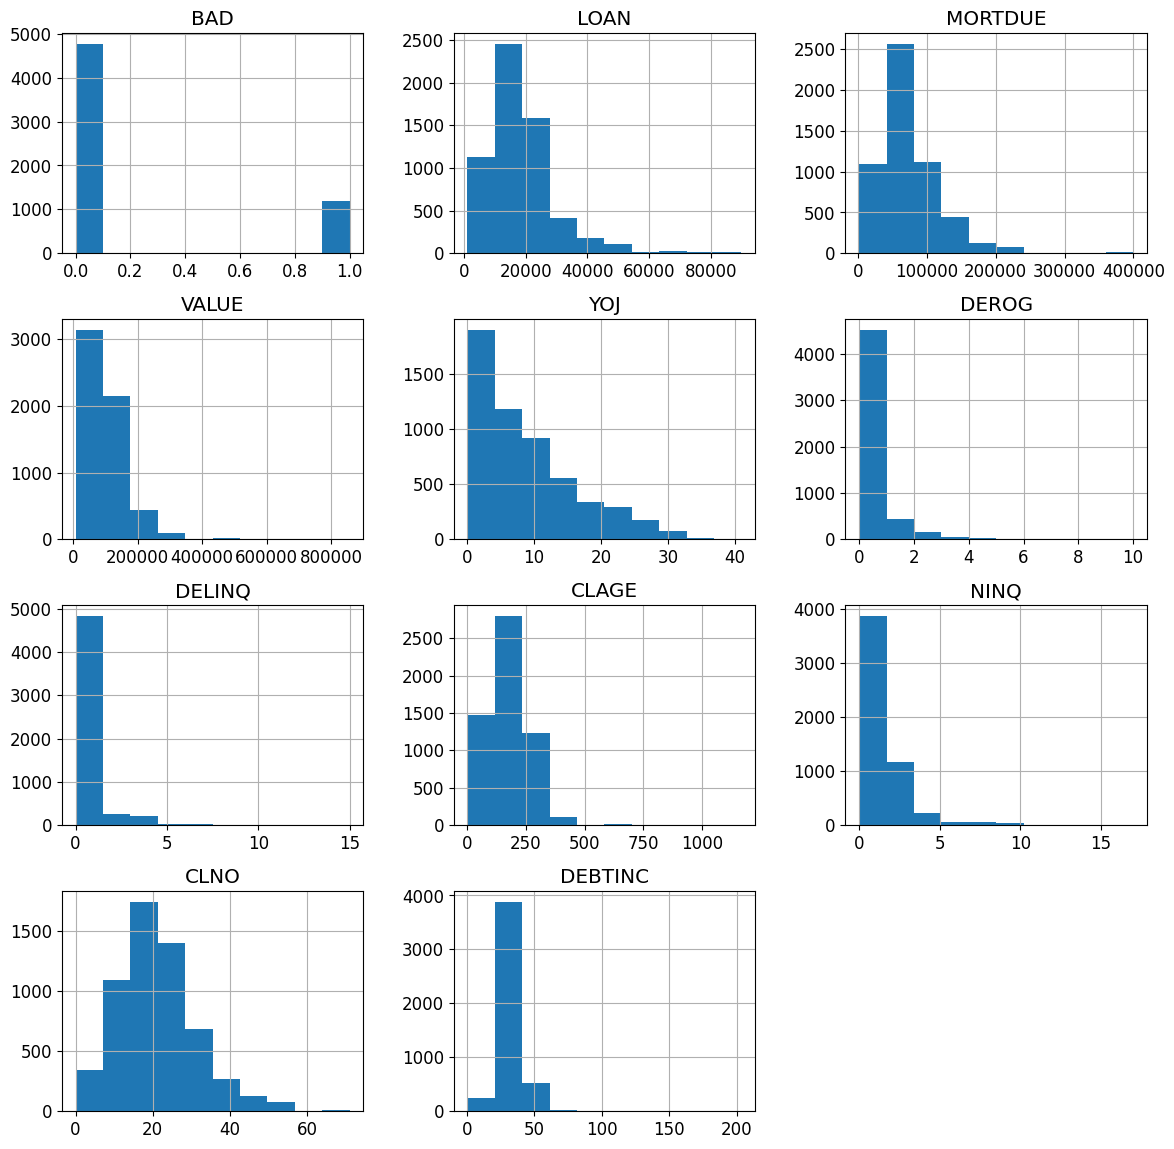

In [135]:
# Creating histograms
data[num_col].hist(figsize = (14, 14))

plt.show()

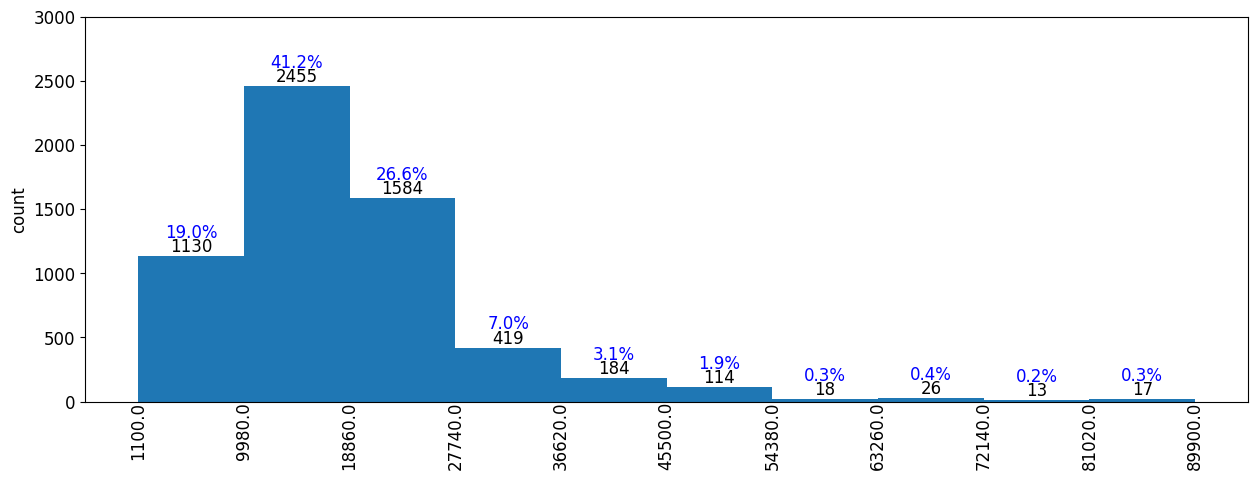

In [136]:
plt.figure(figsize = (15, 5))
plt.rcParams.update({'font.size': 12})
a = 10
col = 'LOAN'   
data[col].dropna().hist(bins=a, grid=False)
plt.ylim(0, np.max(np.histogram(data[col].dropna(), bins=a)[0]) + 50)
plt.xticks([])
# Add to the maximum y axis tick
ticks = plt.yticks()[0]  
plt.yticks(ticks)  
total = float(len(data[col].dropna()))
plt.text(data[col].dropna().max(), 0, str('{:.1f}'.format(data[col].dropna().max())), ha='center', va='top', color = 'black', rotation=90) 

# add data labels to the histogram
for i, v in enumerate(np.histogram(data[col].dropna(), bins=a)[0]):
    plt.text((data[col].dropna().min() + (i + 0.5) * (data[col].dropna().max() - data[col].dropna().min()) / 10), v + 5, str(v), ha='center', va='bottom', color = 'black')

# add percentage labels 
for i, v in enumerate(np.histogram(data[col].dropna(), bins=a)[0]):
    plt.text((data[col].dropna().min() + (i + 0.5) * (data[col].dropna().max() - data[col].dropna().min()) / 10), v + 115, str('{:.1f}%'.format(100 * v / total)), ha='center', va='bottom', color = 'blue')

# add percentage labels 
for i, v in enumerate(np.histogram(data[col].dropna(), bins=a)[0]):
    plt.text((data[col].dropna().min() + (i) * (data[col].dropna().max() - data[col].dropna().min()) / 10), 0, str('{:.1f}'.format(data[col].dropna().min() + (i ) * (data[col].dropna().max() - data[col].dropna().min()) / 10)), ha='center', va='top', color = 'black', rotation=90)

plt.ylim(0, plt.ylim()[1])       
plt.ylabel('count')
plt.show()

**This histogram shows the distribution by loan amount more clearly. More than 40% of borrowers borrow between 10,000 and 19,000. This information can help marketers in attracting new customers as well as developing customer offers.**

### 1. What is the range of values for the loan amount variable "LOAN"?

  - **The LOAN variable has a minimum value of 1100 and a maximum value of 89900, so the range of values for the loan amount variable "LOAN" is from 1100 to 89900.**

### 2. How does the distribution of years at present job "YOJ" vary across the dataset?
- **The distribution is positively skewed, with a higher concentration of borrowers having worked for fewer years.**

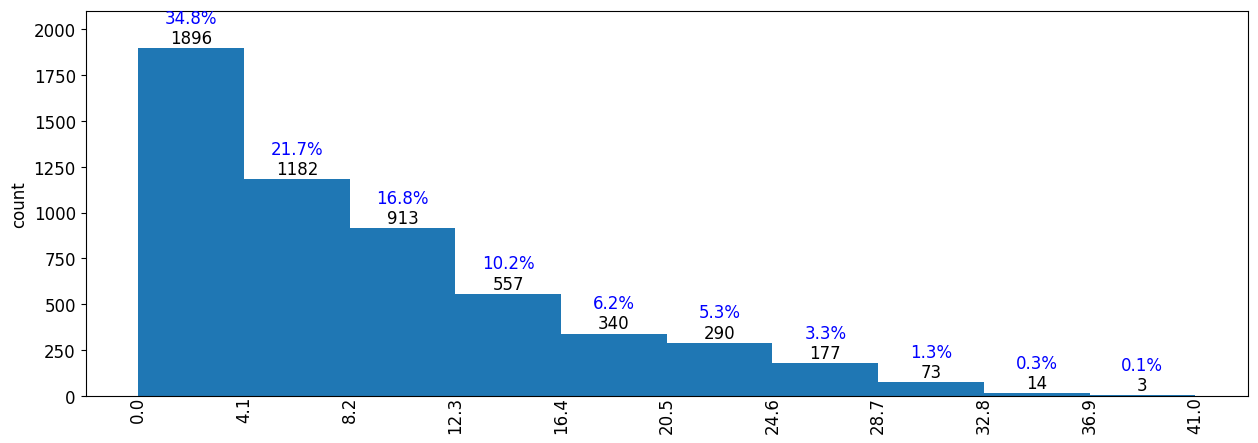

In [137]:
plt.figure(figsize = (15, 5))
plt.rcParams.update({'font.size': 12})
a = 10
col = 'YOJ'   
data[col].dropna().hist(bins=a, grid=False)
plt.ylim(0, np.max(np.histogram(data[col].dropna(), bins=a)[0]) + 100)
plt.xticks([])
# Add to the maximum y axis tick
ticks = plt.yticks()[0]  
plt.yticks(ticks)  
total = float(len(data[col].dropna()))
plt.text(data[col].dropna().max(), 0, str('{:.1f}'.format(data[col].dropna().max())), ha='center', va='top', color = 'black', rotation=90) 

# add data labels to the histogram
for i, v in enumerate(np.histogram(data[col].dropna(), bins=a)[0]):
    plt.text((data[col].dropna().min() + (i + 0.5) * (data[col].dropna().max() - data[col].dropna().min()) / 10), v + 5, str(v), ha='center', va='bottom', color = 'black')

# add percentage labels 
for i, v in enumerate(np.histogram(data[col].dropna(), bins=a)[0]):
    plt.text((data[col].dropna().min() + (i + 0.5) * (data[col].dropna().max() - data[col].dropna().min()) / 10), v + 115, str('{:.1f}%'.format(100 * v / total)), ha='center', va='bottom', color = 'blue')

# add percentage labels 
for i, v in enumerate(np.histogram(data[col].dropna(), bins=a)[0]):
    plt.text((data[col].dropna().min() + (i) * (data[col].dropna().max() - data[col].dropna().min()) / 10), 0, str('{:.1f}'.format(data[col].dropna().min() + (i ) * (data[col].dropna().max() - data[col].dropna().min()) / 10)), ha='center', va='top', color = 'black', rotation=90)

plt.ylim(0, plt.ylim()[1]+100)       
plt.ylabel('count')
plt.show()

### 3. How many unique categories are there in the JOB and the REASON variable?
### 4. What is the most common category in the JOB and the REASON variable?

- **Category "Other" is the most common category in the JOB. The JOB has 6 unique categories.**
- **Category "DebtCon" is the most common category in the REASON. The REASON has 2 unique categories.**

In [138]:
for col in cat_col:
    print(data[col].value_counts())
    print(' ')

DebtCon    3928
HomeImp    1780
Name: REASON, dtype: int64
 
Other      2388
ProfExe    1276
Office      948
Mgr         767
Self        193
Sales       109
Name: JOB, dtype: int64
 


# Bivariate Analysis

### 5. Is there a relationship between the REASON variable and the proportion of applicants who defaulted on their loan?

    REASON  BAD         0
2  HomeImp    0  0.777528
3  HomeImp    1  0.222472
0  DebtCon    0  0.810336
1  DebtCon    1  0.189664


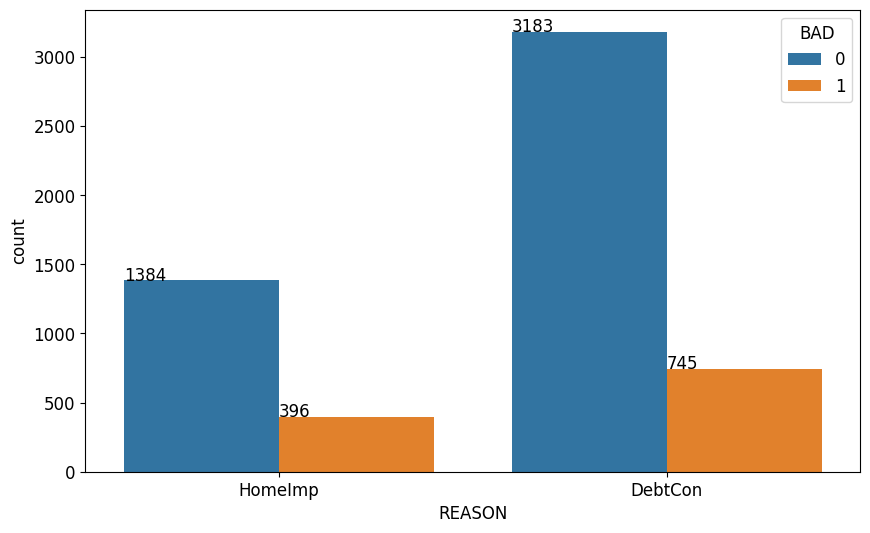

In [139]:
plt.figure(figsize = (10, 6))

ax = sns.countplot(x = 'REASON', hue = 'BAD', data = data)
i = 1
# Annotating the exact count on the top of the bar for each category 
for p in ax.patches:
  
    ax.annotate(p.get_height(), (p.get_x(), p.get_height()+ 0.35))
    i = i +1
grouped_B = data.groupby(['REASON', 'BAD']).size()
grouped_R = data.groupby(['REASON']).size()
percent = grouped_B/grouped_R
percent = percent.reset_index()
percent = percent.sort_values(by='REASON', ascending=False)
print(percent)
    
plt.show()



- **Let's create a contingency table of the REASON and BAD variables using the crosstab() function from Pandas, and then performs a chi-squared test using the chi2_contingency() function from the scipy.stats module. The resulting chi2 and p_value statistics will indicate whether there is a significant association between the two variables.**

- **If the p-value is less than the chosen significance level (e.g., 0.05), then we can reject the null hypothesis that the two variables are independent and conclude that there is a statistically significant relationship between REASON and BAD variables.**

In [140]:
# create a contingency table of REASON and BAD variables
contingency_table = pd.crosstab(data['REASON'], data['BAD'])

# perform the chi-squared test
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# print the results
print('Chi-Squared Statistic:', chi2)
print('P-Value:', p_value)

Chi-Squared Statistic: 8.039751291499368
P-Value: 0.004576181950707232


#### The results of the chi-squared test indicates that there is a statistically significant relationship between the REASON and BAD variables.
   - *The chi-squared statistic is a measure of the difference between the observed and expected frequencies in the contingency table. In our case, the chi-squared statistic is 8.04, which is greater than the critical value at a 0.05 significance level with 1 degree of freedom. This means that the observed frequencies in the contingency table are significantly different from what we would expect if the two variables were independent.*

   - *In this case, the p-value is 0.0046, which is less than the chosen significance level of 0.05. Therefore, we can reject the null hypothesis and conclude that there is a statistically significant relationship between the REASON and BAD variables.*


### 6. Do applicants who default have a significantly different loan amount compared to those who repay their loan?

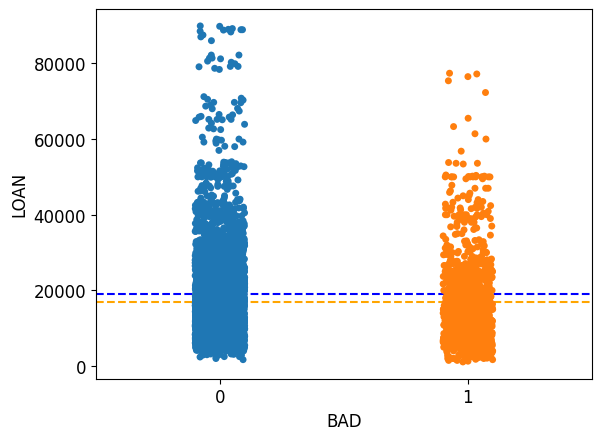

In [141]:
# create a strip plot of loan amount by default status
sns.stripplot(y='LOAN', x='BAD', data=data)

# calculate the mean loan amount for bad loans
mean_bad_loans = data[data['BAD'] == 1]['LOAN'].mean()

# calculate the mean loan amount for good loans
mean_good_loans = data[data['BAD'] == 0]['LOAN'].mean()

# add horizontal lines at the locations of the means
plt.axhline(mean_bad_loans, color='orange', linestyle='--')
plt.axhline(mean_good_loans, color='blue', linestyle='--')

# display the plot
plt.show()

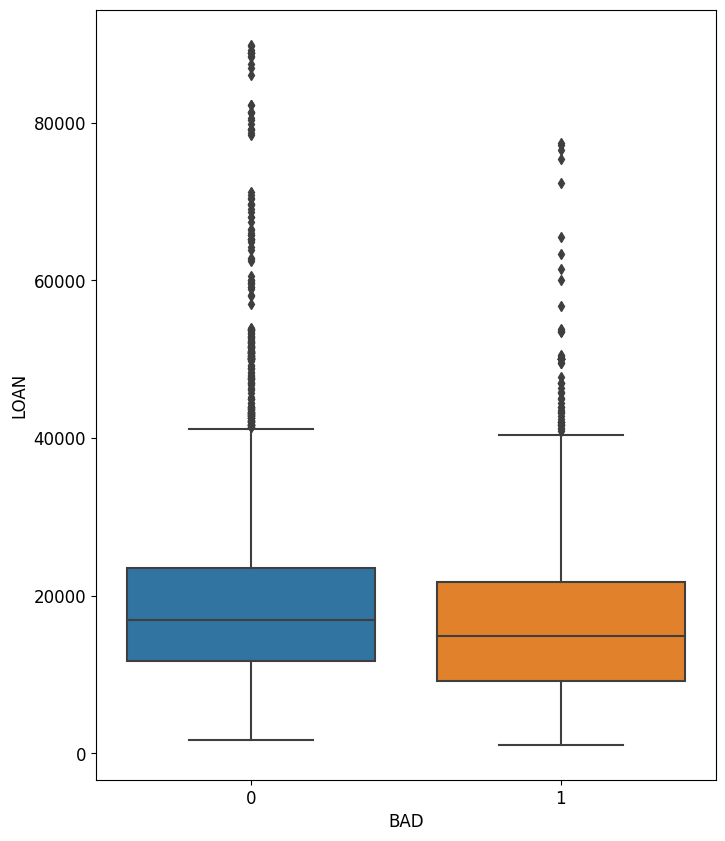

In [142]:
plt.figure(figsize = (8, 10))

sns.boxplot(y='LOAN', x='BAD', data=data)

plt.show()

In [143]:
# calculate the mean loan amount for each group
bad_loans = data[data['BAD'] == 1]['LOAN'].mean()
good_loans = data[data['BAD'] == 0]['LOAN'].mean()

# perform a t-test
t_statistic, p_value = stats.ttest_ind(data[data['BAD'] == 1]['LOAN'], data[data['BAD'] == 0]['LOAN'], equal_var=False)

# print the results
print('Mean loan amount for bad loans:', bad_loans)
print('Mean loan amount for good loans:', good_loans)
print('T-Statistic:', t_statistic)
print('P-Value:', p_value)

Mean loan amount for bad loans: 16922.11942809083
Mean loan amount for good loans: 19028.107315028297
T-Statistic: -5.720042746865789
P-Value: 1.2455336996284883e-08


#### Based on the results of the t-test, applicants who default do have a significantly different loan amount compared to those who repay their loan.

 - **The mean loan amount for bad loans is 16922.12, which is lower than the mean loan amount for good loans (19028.11). The t-test statistic is -5.72, which is significant at the 0.05 level. The p-value is very small (1.25e-08), which indicates that the difference in loan amounts between the two groups is unlikely to be due to chance.**

 - **Therefore, we can conclude that there is a statistically significant difference in the loan amounts for applicants who default and those who do not, and that loan amount may be a useful predictor of loan default.**

### 7. Is there a correlation between the value of the property and the loan default rate?

- **We will test correlation by calculating the correlation coefficient. However, since VALUE contains missing values, in this code, we will first remove any infinite values from the VALUE and BAD variables using numpy.isfinite().**

In [144]:
# remove infinite and missing values from VALUE and BAD variables
value = data['VALUE'][np.isfinite(data['VALUE'])].dropna()
bad = data['BAD'][np.isfinite(data['VALUE'])].dropna()

# calculate the Pearson correlation coefficient between VALUE and BAD
corr_coef, p_value = stats.pearsonr(value, bad)

# print the results
print('Pearson correlation coefficient:', "{:.2%}".format(corr_coef))

Pearson correlation coefficient: -3.00%


### 8. Do applicants who default have a significantly different mortgage amount compared to those who repay their loan?

#### Based on the results of the t-test, there is evidence to suggest that applicants who default have a significantly different mortgage amount compared to those who repay their loan. 
- **The mean mortgage amount for bad loans is 69460.45 USD, while the mean mortgage amount for good loans is 74,829.25 USD. The t-statistic is -3.38, with a p-value of 0.00075, indicating that the difference in means is statistically significant.**

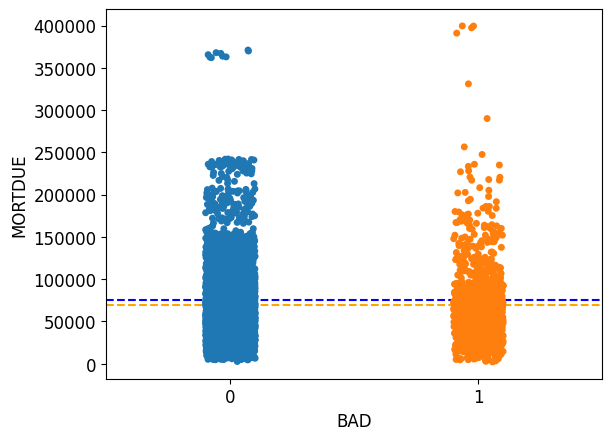

In [145]:
# create a strip plot of loan amount by default status
sns.stripplot(y='MORTDUE', x='BAD', data=data)

# calculate the mean loan amount for bad loans
mean_bad_loans = data[data['BAD'] == 1]['MORTDUE'].mean()

# calculate the mean loan amount for good loans
mean_good_loans = data[data['BAD'] == 0]['MORTDUE'].mean()

# add horizontal lines at the locations of the means
plt.axhline(mean_bad_loans, color='orange', linestyle='--')
plt.axhline(mean_good_loans, color='blue', linestyle='--')

# display the plot
plt.show()

In [146]:
# calculate the mean mortgage amount for each group
bad_mortgage = data[data['BAD'] == 1]['MORTDUE'].mean()
good_mortgage = data[data['BAD'] == 0]['MORTDUE'].mean()

# perform a t-test
t_statistic, p_value = stats.ttest_ind(data[data['BAD'] == 1]['MORTDUE'].dropna(), data[data['BAD'] == 0]['MORTDUE'].dropna(), equal_var=False)

# print the results
print('Mean mortgage amount for bad loans:', bad_mortgage)
print('Mean mortgage amount for good loans:', good_mortgage)
print('T-Statistic:', t_statistic)
print('P-Value:', p_value)

Mean mortgage amount for bad loans: 69460.45297322252
Mean mortgage amount for good loans: 74829.2490548291
T-Statistic: -3.377418509434846
P-Value: 0.000749659556451092


#### We can conclude that there is a significant association between the job type and the probability of a customer defaulting on a loan. This is also confirmed by the default rates for each profession. The highest default rates are among sales and self-employed occupations.

In [147]:
# create a pivot table of JOB and BAD variables
job_bad_table = pd.crosstab(data['JOB'], data['BAD'])

# chi - test
chi2, p_value, dof, expected = stats.chi2_contingency(job_bad_table)

# display the results
print('Chi-Squared Statistic:', chi2)
print('P-Value:', p_value)

Chi-Squared Statistic: 81.93248953692773
P-Value: 3.306676232858524e-16


In [148]:
# create a pivot table of JOB and BAD variables
pivot_table = pd.pivot_table(data, values='BAD', index='JOB', aggfunc=lambda x: np.mean(x)*100)

# sort the pivot table by the BAD column in descending order
pivot_table = pivot_table.sort_values(by='BAD', ascending=False)

# rename the columns
pivot_table.columns = ['% of Bad Loans']

# define a function to highlight cells with value greater than 30%
def highlight_greater_than_30(val):
    color = 'red' if val > 30 else 'black'
    return 'color: %s' % color

# apply the function to the pivot table
styled_table = pivot_table.style.applymap(highlight_greater_than_30)

# display the styled table
styled_table

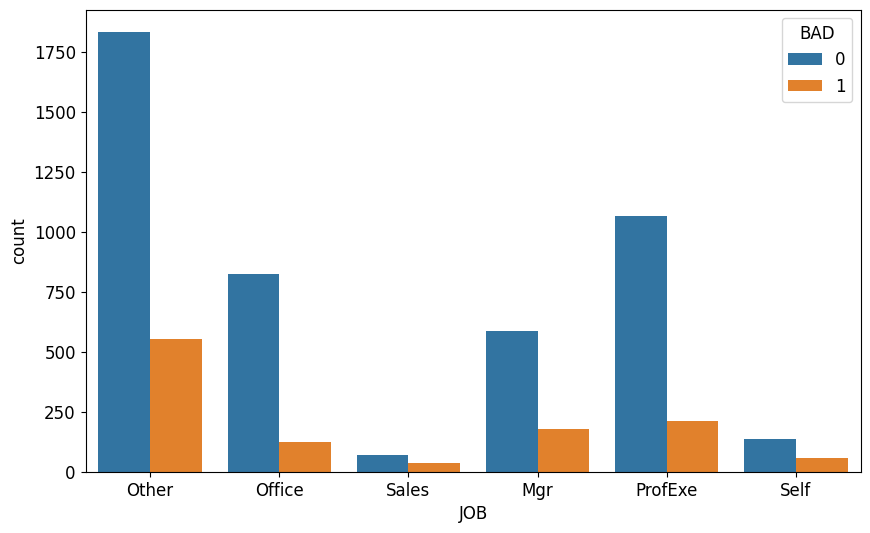

In [149]:

plt.figure(figsize = (10, 6))

sns.countplot(x = 'JOB', hue = 'BAD', data = data)

plt.show()

#### If a borrower has 6 or more delinquent credit lines, the probability of default approaches 100%

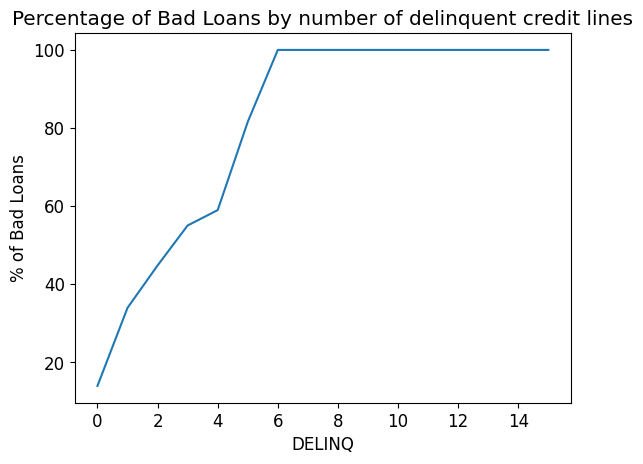

In [150]:
# create a pivot table of DELINQ and BAD variables
pivot_table = pd.pivot_table(data, values='BAD', index='DELINQ', aggfunc=lambda x: np.mean(x)*100)

# sort the pivot table by the DELINQ column in ascending order
pivot_table = pivot_table.sort_values(by='DELINQ', ascending=True)

# rename the columns
pivot_table.columns = ['% of Bad Loans']

# plot the line graph
plt.plot(pivot_table.index, pivot_table['% of Bad Loans'])
plt.title('Percentage of Bad Loans by number of delinquent credit lines')
plt.xlabel('DELINQ')
plt.ylabel('% of Bad Loans')
plt.show()

#### If a borrower has 7 or more major derogatory reports, the probability of default approaches 100%

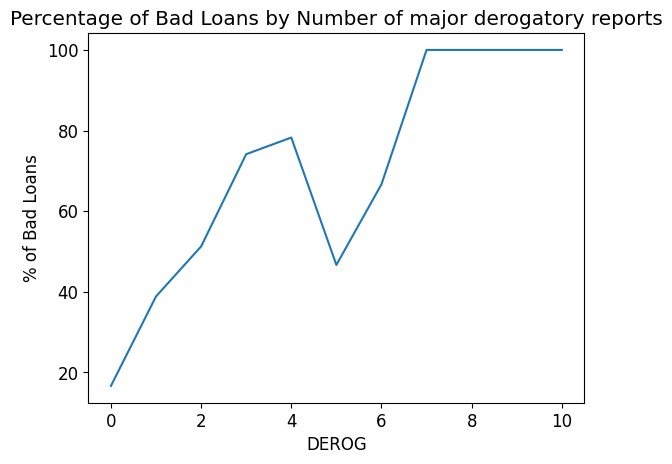

In [151]:

# create a pivot table of DELINQ and BAD variables
pivot_table = pd.pivot_table(data, values='BAD', index='DEROG', aggfunc=lambda x: np.mean(x)*100)

# sort the pivot table by the DELINQ column in ascending order
pivot_table = pivot_table.sort_values(by='DEROG', ascending=True)

# rename the columns
pivot_table.columns = ['% of Bad Loans']

# plot the line graph
plt.plot(pivot_table.index, pivot_table['% of Bad Loans'])
plt.title('Percentage of Bad Loans by Number of major derogatory reports')
plt.xlabel('DEROG')
plt.ylabel('% of Bad Loans')
plt.show()

### Is there a relationship between the age of the oldest credit line in months and loan default?

**In this case, the t-statistic is -12.96 and the p-value is 1.0785e-36, which indicates that the differences between the groups are significant. The mean value of credit age (CLAGE) for the group BAD=0 (paid loans) is higher than that for the group BAD=1 (unpaid loans), which may indicate that older loans are more reliable.**

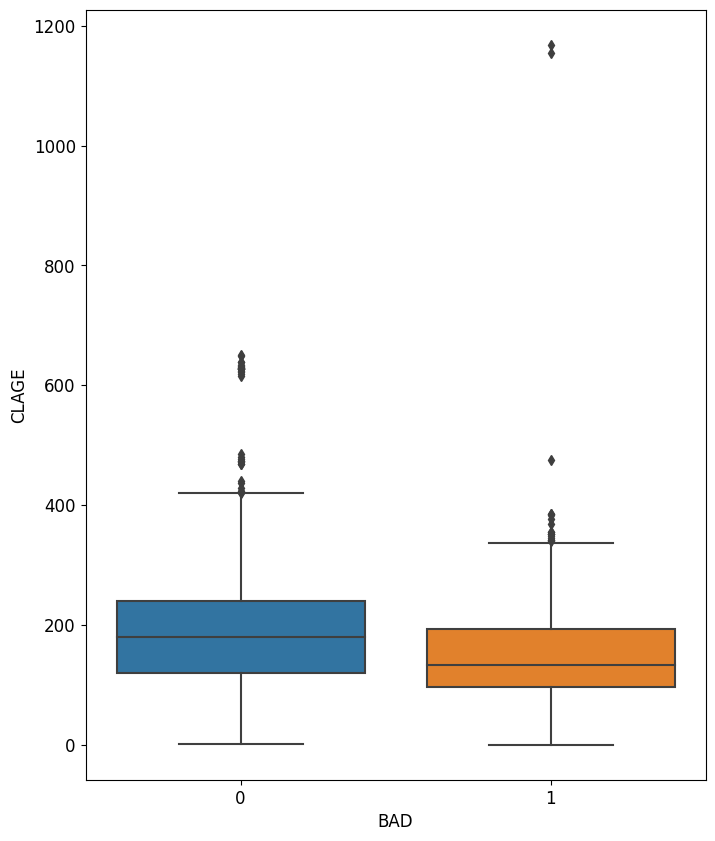

In [152]:
plt.figure(figsize = (8, 10))

sns.boxplot(y='CLAGE', x='BAD', data=data)

plt.show()

In [153]:
# calculate the mean mortgage amount for each group
bad_loan = data[data['BAD'] == 1]['CLAGE'].mean()
good_loan = data[data['BAD'] == 0]['CLAGE'].mean()

# perform a t-test
t_statistic, p_value = stats.ttest_ind(data[data['BAD'] == 1]['CLAGE'].dropna(), data[data['BAD'] == 0]['CLAGE'].dropna(), equal_var=False)

# print the results
print('Mean age of the oldest credit line for bad loans: \033[1m{}\033[0m'.format(round(bad_loan)), '\033[1mmonths\033[0m')
print('Mean age of the oldest credit line for good loans: \033[1m{}\033[0m'.format(round(good_loan)), '\033[1mmonths\033[0m')
print('T-Statistic: \033[1m{}\033[0m'.format(t_statistic))
print('P-Value: \033[1m{}\033[0m'.format(p_value))

Mean age of the oldest credit line for bad loans: 150 months
Mean age of the oldest credit line for good loans: 187 months
T-Statistic: -12.960945049977436
P-Value: 1.0785360863493084e-36


In [154]:
# calculate the mean years of job for each group
bad_loan = data[data['BAD'] == 1]['YOJ'].mean()
good_loan = data[data['BAD'] == 0]['YOJ'].mean()

# perform a t-test
t_statistic, p_value = stats.ttest_ind(data[data['BAD'] == 1]['YOJ'].dropna(), data[data['BAD'] == 0]['YOJ'].dropna(), equal_var=False)

# print the results
print('Mean years of job for bad loans: \033[1m{}\033[0m'.format(round(bad_loan,1)), '\033[1yyears\033[0m')
print('Mean years of job for good loans: \033[1m{}\033[0m'.format(round(good_loan,1)), '\033[1yyears\033[0m')
print('T-Statistic: \033[1m{}\033[0m'.format(t_statistic))
print('P-Value: \033[1m{}\033[0m'.format(p_value))

Mean years of job for bad loans: 8.0 years
Mean years of job for good loans: 9.2 years
T-Statistic: -4.6603785260375625
P-Value: 3.3798921146392507e-06


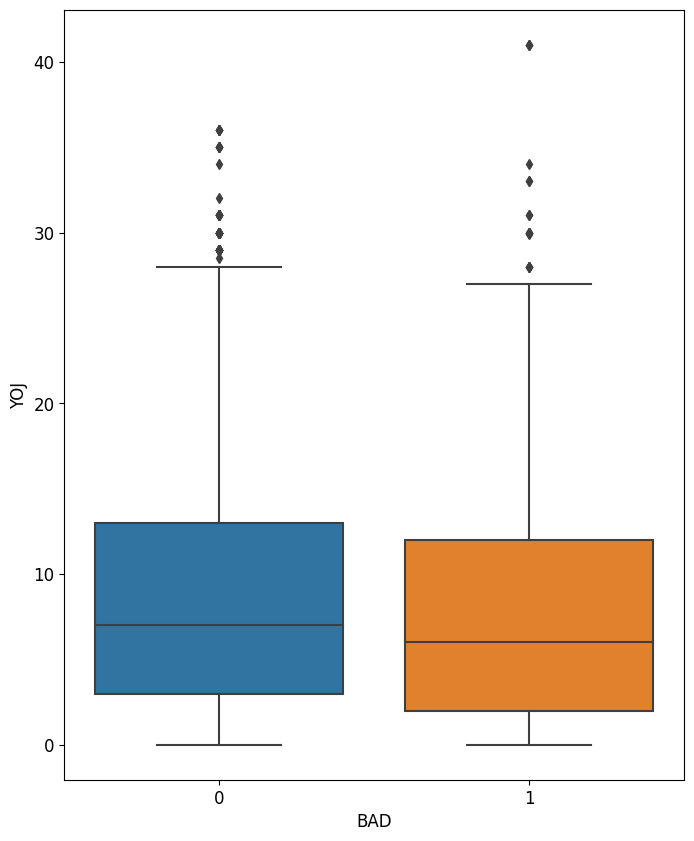

In [155]:
plt.figure(figsize = (8, 10))

sns.boxplot(y='YOJ', x='BAD', data=data)

plt.show()

### Is there a relationship between debt-to-income ratio and loan default?

**In this case, the t-statistic is 6.9 and the p-value is 1.98e-11, indicating that the differences between the groups are significant. The mean DEBTINC for group BAD=1 (not paid loans) is higher than for group BAD=0 (paid loans), suggesting that higher debt-to-income ratios may be associated with a higher risk of default.**

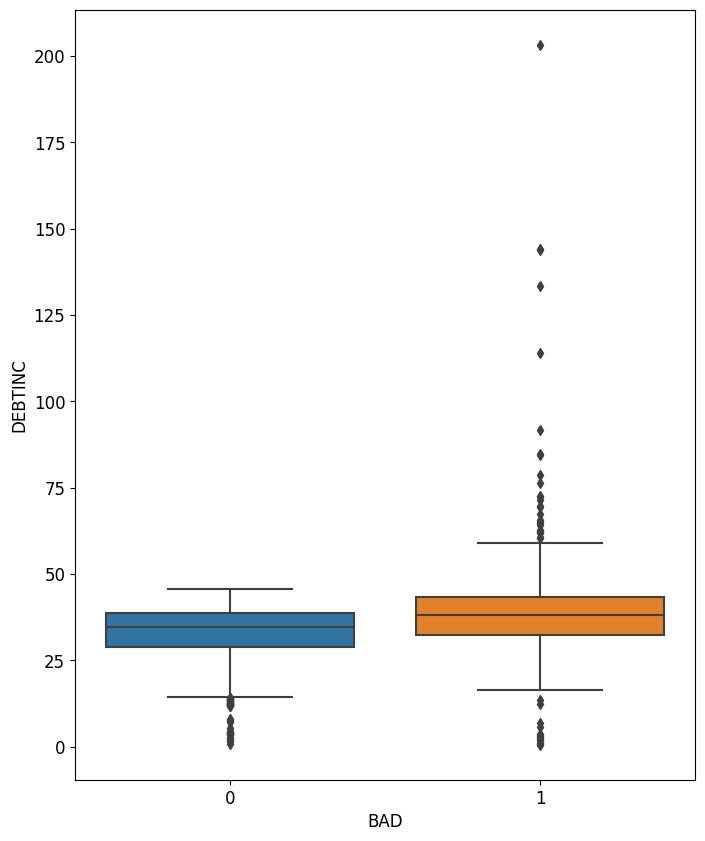

In [156]:
plt.figure(figsize = (8, 10))

sns.boxplot(y='DEBTINC', x='BAD', data=data)

plt.show()

In [157]:
# calculate the mean mortgage amount for each group
bad_loan = data[data['BAD'] == 1]['DEBTINC'].mean()
good_loan = data[data['BAD'] == 0]['DEBTINC'].mean()

# perform a t-test
t_statistic, p_value = stats.ttest_ind(data[data['BAD'] == 1]['DEBTINC'].dropna(), data[data['BAD'] == 0]['DEBTINC'].dropna(), equal_var=False)

# print the results
print('Mean debt-to-income ratio for bad loans:', bad_loan)
print('Mean debt-to-income ratio for good loans:', good_loan)
print('T-Statistic:', t_statistic)
print('P-Value:', p_value)

Mean debt-to-income ratio for bad loans: 39.387644892291064
Mean debt-to-income ratio for good loans: 33.25312863402213
T-Statistic: 6.898731654644972
P-Value: 1.976105933172547e-11


# **Multivariate Analysis**

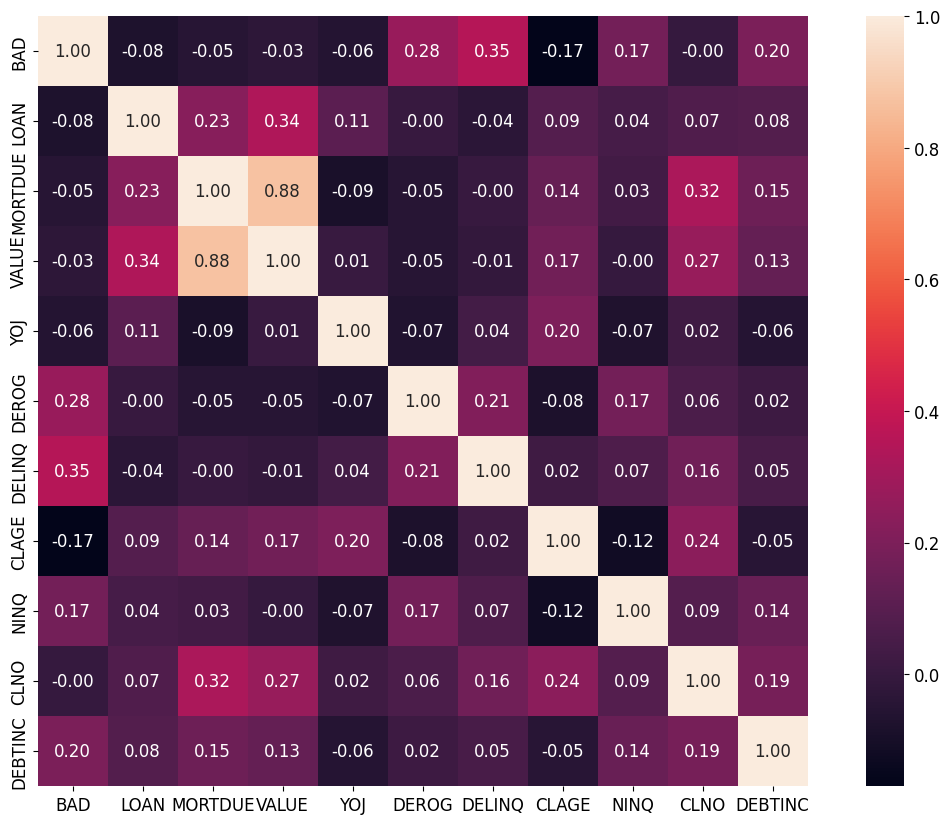

In [158]:
plt.figure(figsize = (15, 10))

sns.heatmap(data.corr(), annot = True, fmt = '0.2f', square=True)

plt.show()

It can be noticed that the variables DELINQ, DEROG, and DEBTINC are the most positively correlated with BAD, which may indicate that their values can be strong predictors of whether the borrower will repay the loan on time.

DELINQ (number of past due payments) has the highest correlation with BAD (loan default indicator) and DEROG (number of serious derogatory marks on credit report), as well as a moderate correlation with CLNO (number of credit lines).

DEROG (number of serious derogatory marks on credit report) has the highest correlation with BAD (loan default indicator) and DELINQ (number of past due payments), as well as a moderate correlation with DEBTINC (debt-to-income ratio).

DEBTINC (debt-to-income ratio) has a moderate correlation with MORTDUE (mortgage amount due) and VALUE (estimated property value), as well as a weak correlation with BAD (loan default indicator), DEROG (number of serious derogatory marks on credit report), and DELINQ (number of past due payments).

In addition, a strong correlation between MORTDUE and VALUE variables can be observed, which may indicate that these variables may be highly interdependent.

The variables CLAGE, NINQ, and YOJ have a weak correlation with BAD, which means that they may not be strong predictors of possible loan default.

# Important Insights from EDA

**What are the the most important observations and insights from the data based on the EDA performed?**
- **The variables DELINQ, DEROG, and DEBTINC are the most positively correlated with BAD, which may indicate that their values can be strong predictors of whether the borrower will repay the loan on time.**
- **If a borrower has 6 or more delinquent credit lines or has 7 or more major derogatory reports, the probability of default approaches 100%.**
- **LOAN, MORTDUE, CLAGE, DEBTINC, YOJ have significant difference between the their means and the probability of a customer defaulting on a loan.**

# Treating Missing Values

**Let's create a copy of the original dataframe. In this copy, we will create duplicates of columns. If a value is missing, we will set it to 1, and if the value is not missing, we will set it to 0.**

In [159]:
data_L = data.copy()

# Creating duplicates of columns 
for col in data_L.columns:
    data_L[col + '_L'] = data_L[col]

# marking missing values
for col in data_L.columns:
    if data_L[col].isnull().any():
        data_L[col + '_L'] = data_L[col + '_L'].isnull().astype(int)

# Displaying the first 5 rows of the dataframe
print(data_L.head())

   BAD  LOAN  MORTDUE     VALUE   REASON     JOB   YOJ  DEROG  DELINQ  \
0    1  1100  25860.0   39025.0  HomeImp   Other  10.5    0.0     0.0   
1    1  1300  70053.0   68400.0  HomeImp   Other   7.0    0.0     2.0   
2    1  1500  13500.0   16700.0  HomeImp   Other   4.0    0.0     0.0   
3    1  1500      NaN       NaN      NaN     NaN   NaN    NaN     NaN   
4    0  1700  97800.0  112000.0  HomeImp  Office   3.0    0.0     0.0   

        CLAGE  ...  VALUE_L  REASON_L  JOB_L  YOJ_L  DEROG_L  DELINQ_L  \
0   94.366667  ...        0         0      0      0        0         0   
1  121.833333  ...        0         0      0      0        0         0   
2  149.466667  ...        0         0      0      0        0         0   
3         NaN  ...        1         1      1      1        1         1   
4   93.333333  ...        0         0      0      0        0         0   

   CLAGE_L  NINQ_L  CLNO_L  DEBTINC_L  
0        0       0       0          1  
1        0       0       0          

**We will create a copy of the original dataframe and fill in the missing values. We need a copy so that we can try out different methods for filling in the missing values. The following methods were analyzed:**

   **1. Dropping rows with the highest number of missing values.**
   
   **2. Filling in with median/mode and KNN method.**

**The best result was achieved by filling missing values in MORTDUE and VALUE using the KNN method and filling missing value in another collumns with median, but taking into account the BAD value.**

**This conclusion about "taking into account the BAD value" follows from the analysis above, when we observed differences in values in the case of default and credit repayment.**

In [184]:
dataM = data.copy()

In [185]:
# Check for missing values before applying any imputation techniques.
print(dataM.isna().sum())

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64


In [186]:
# Creating a KNNImputer object
imputer = KNNImputer(n_neighbors=5)

# Selecting features for imputing missing values
features = [ 'MORTDUE', 'VALUE']

# Filling missing values using KNNImputer
dataM[features] = imputer.fit_transform(dataM[features])

# Printing missing value information after imputation
print(dataM.isna().sum())

BAD           0
LOAN          0
MORTDUE       0
VALUE         0
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64


In [187]:
# fill missing values with median, taking into account the BAD column
for col in num_col:
    for value in dataM['BAD'].unique():
        median_val = dataM[dataM['BAD'] == value][col].median()
        dataM.loc[(dataM['BAD'] == value) & (dataM[col].isnull()), col] = median_val

In [188]:
# create a function to fill missing values with mode, taking into account the BAD column
def fillna_mode_with_bad(data, cat_col):
    for col in cat_col:
        # определяем моду
        mode = dataM[dataM['BAD'] == 0][col].mode()[0]
        # заполняем пропущенные значения для BAD = 0 модой
        dataM.loc[(dataM[col].isnull()) & (dataM['BAD'] == 0), col] = mode
        # определяем моду для BAD = 1
        mode = dataM[dataM['BAD'] == 1][col].mode()[0]
        # заполняем пропущенные значения для BAD = 1 модой
        dataM.loc[(dataM[col].isnull()) & (dataM['BAD'] == 1), col] = mode
    return data

# заполняем пропущенные значения модой с учетом BAD для столбцов из cat_col
dataM = fillna_mode_with_bad(dataM, cat_col)

In [189]:
dataM.isnull().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

## **Model Building - Approach**
- Data preparation
- Partition the data into train and test set
- Build the model
- Fit on the train data
- Tune the model
- Test the model on test set

### Create copy for LGBM Classifier

In [190]:
dataLGB = dataM.copy()

In [191]:
dataLGB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5960 non-null   float64
 3   VALUE    5960 non-null   float64
 4   REASON   5960 non-null   object 
 5   JOB      5960 non-null   object 
 6   YOJ      5960 non-null   float64
 7   DEROG    5960 non-null   float64
 8   DELINQ   5960 non-null   float64
 9   CLAGE    5960 non-null   float64
 10  NINQ     5960 non-null   float64
 11  CLNO     5960 non-null   float64
 12  DEBTINC  5960 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [192]:
job_mappingJ = {'Self': 0, 'ProfExe': 1, 'Other': 2, 'Mgr': 3, 'Office': 4, 'Sales': 5}
dataLGB['JOB'] = dataLGB['JOB'].map(job_mappingJ)

In [193]:
job_mappingR = {'DebtCon': 0, 'HomeImp': 1}
dataLGB['REASON'] = dataLGB['REASON'].map(job_mappingR)

In [194]:
dataLGB.head()

BAD  LOAN     MORTDUE          VALUE  REASON  JOB   YOJ  DEROG  DELINQ  \
0    1  1100  25860.0000   39025.000000       1    2  10.5    0.0     0.0   
1    1  1300  70053.0000   68400.000000       1    2   7.0    0.0     2.0   
2    1  1500  13500.0000   16700.000000       1    2   4.0    0.0     0.0   
3    1  1500  73760.8172  101776.048741       0    2   6.0    0.0     0.0   
4    0  1700  97800.0000  112000.000000       1    4   3.0    0.0     0.0   

        CLAGE  NINQ  CLNO    DEBTINC  
0   94.366667   1.0   9.0  38.079762  
1  121.833333   0.0  14.0  38.079762  
2  149.466667   1.0  10.0  38.079762  
3  132.866667   1.0  20.0  38.079762  
4   93.333333   0.0  14.0  34.541671

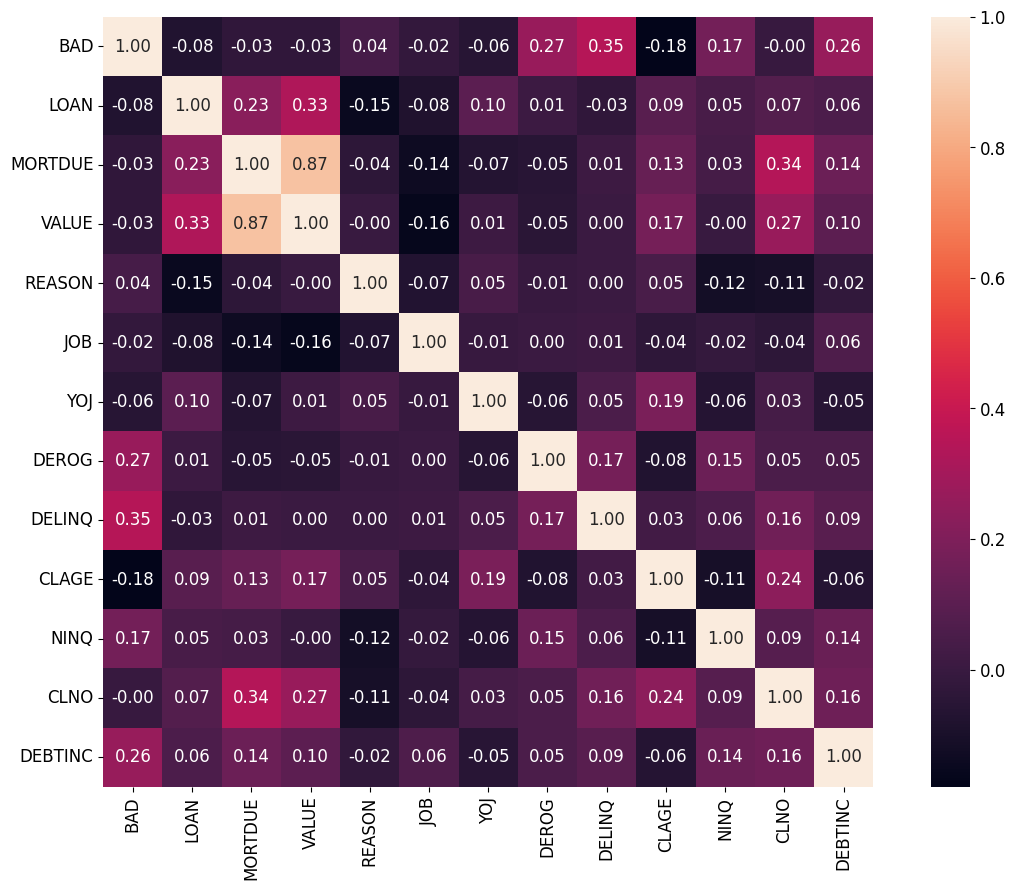

In [69]:
plt.figure(figsize = (15, 10))

sns.heatmap(dataLGB.corr(), annot = True, fmt = '0.2f', square=True)

plt.show()

# Converting categorical columns using the get_dummies function

In [195]:
# ПConverting categorical columns using the get_dummies function
encoded_data = pd.get_dummies(dataM[cat_col], prefix=cat_col, drop_first=True)

# Replacing categorical columns with dummy variables columns
dataM = pd.concat([dataM.drop(cat_col, axis=1), encoded_data], axis=1)

In [196]:
dataM.head()

BAD  LOAN     MORTDUE          VALUE   YOJ  DEROG  DELINQ       CLAGE  \
0    1  1100  25860.0000   39025.000000  10.5    0.0     0.0   94.366667   
1    1  1300  70053.0000   68400.000000   7.0    0.0     2.0  121.833333   
2    1  1500  13500.0000   16700.000000   4.0    0.0     0.0  149.466667   
3    1  1500  73760.8172  101776.048741   6.0    0.0     0.0  132.866667   
4    0  1700  97800.0000  112000.000000   3.0    0.0     0.0   93.333333   

   NINQ  CLNO    DEBTINC  REASON_HomeImp  JOB_Office  JOB_Other  JOB_ProfExe  \
0   1.0   9.0  38.079762               1           0          1            0   
1   0.0  14.0  38.079762               1           0          1            0   
2   1.0  10.0  38.079762               1           0          1            0   
3   1.0  20.0  38.079762               0           0          1            0   
4   0.0  14.0  34.541671               1           1          0            0   

   JOB_Sales  JOB_Self  
0          0         0  
1          0         0  
2          0         0  
3          0         0  
4          0         0

In [197]:
# Creating metric function

def metrics_score(actual, predicted):
    
    print(classification_report(actual, predicted))
    
    cm = confusion_matrix(actual, predicted)
    
    plt.figure(figsize = (8, 5))
    
    sns.heatmap(cm, annot = True, fmt = '.2f', xticklabels = ['NOT DEFAULT', 'DEFAULT'], yticklabels = ['NOT DEFAULT', 'DEFAULT'])
    plt.ylabel('Actual')
    
    plt.xlabel('Predicted')
    
    plt.show()
    
def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    
    predictors: independent variables
    
    target: dependent variable
    """

    # Predicting using the independent variables
    pred = model.predict(predictors)

    recall = recall_score(target, pred,average = 'macro')                 # To compute recall
    
    precision = precision_score(target, pred, average = 'macro')              # To compute precision
               
    acc = accuracy_score(target, pred)                                 # To compute accuracy score
    

    # Creating a dataframe of metrics
    
    df_perf = pd.DataFrame(
        {
            "Precision":  precision,
            "Recall":  recall,
            "Accuracy": acc,
        },
        
        index = [0],
    )

    return df_perf

# Treatment of outliers

- **Since logistic regression is sensitive to outliers, it is recommended to treat them. For this, we will create a separate dataframe, which will not be used for decision tree later.**
- **Instead of removing or treating outliers, we can use normalization methods. In the case of credit lending, "outliers" may not actually be outliers, but the outliers can be actually valid value. Therefore, it is reasonable to use classification methods that are not sensitive to outliers, such as Decision Trees and others.**

- **Also removing or treating outliers can distort the data, especially if significant amounts of data are removed or replaced.**
- **After using the IQR method, the data became distorted, confirming the hypothesis.**

# Logistic Regression

In [84]:
dataR = dataM.copy()

**Since the dataframe contains binary columns, to avoid distorting information in them, we will use MinMaxScaler() for normalization. After its application, all values will be within the range of 0 to 1.**

In [85]:
Y = dataR.BAD

X = dataR.drop(['BAD'], axis = 1)

sc = MinMaxScaler()

X_scaled = sc.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns = X.columns)

# Splitting the data
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size = 0.3, random_state = 1, stratify = Y)

In [86]:
print(Y.value_counts())


0    4771
1    1189
Name: BAD, dtype: int64


In [87]:
# Fitting the logistic regression model
lg = LogisticRegression()

lg.fit(x_train,y_train)

LogisticRegression()

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      3340
           1       0.81      0.26      0.39       832

    accuracy                           0.84      4172
   macro avg       0.83      0.62      0.65      4172
weighted avg       0.84      0.84      0.81      4172



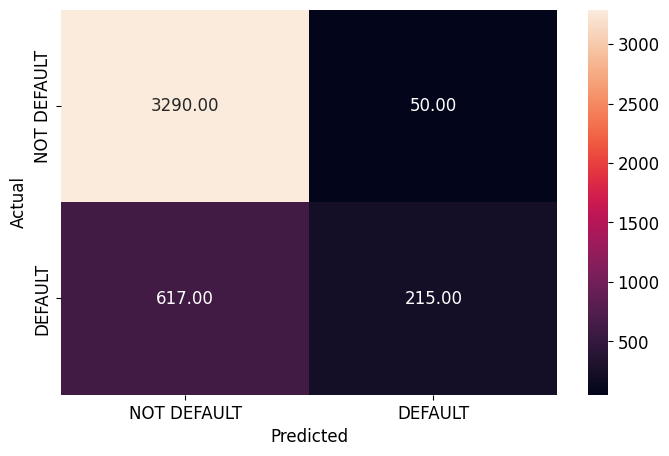

In [88]:

# Checking the performance on the training data
y_pred_trainLg = lg.predict(x_train)

metrics_score(y_train, y_pred_trainLg)

**These metrics for test data indicate that the model correctly classified 72% of the actual positive instances (precision), captured 34% of all the positive instances (recall), and achieved a balanced trade-off between precision and recall (F1-score). The model's performance can be further improved by fine-tuning hyperparameters or using different classification algorithms.**

              precision    recall  f1-score   support

           0       0.84      0.98      0.90      1431
           1       0.76      0.23      0.35       357

    accuracy                           0.83      1788
   macro avg       0.80      0.60      0.63      1788
weighted avg       0.82      0.83      0.79      1788



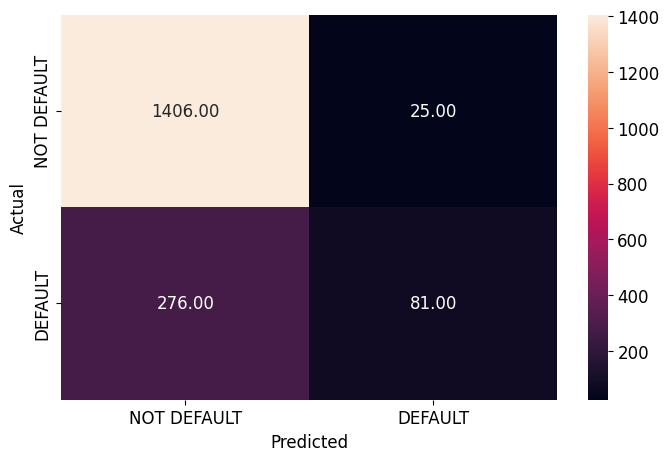

In [89]:
# Checking the performance on the test dataset
y_pred_testLg = lg.predict(x_test)
metrics_score(y_test, y_pred_testLg)

**The larger the magnitude of the coefficient, the stronger the correlation. In our case, variables such as DELINQ and DEBTINC have the largest positive coefficients, indicating a strong positive correlation with default, while variables such as CLAGE and LOAN have the largest negative coefficients, indicating a strong negative correlation with default.**

In [90]:
# Printing the coefficients of logistic regression
cols = X.columns

coef_lg = lg.coef_

pd.DataFrame(coef_lg,columns = cols).T.sort_values(by = 0, ascending = False)


0
DELINQ          8.116356
DEBTINC         7.968688
DEROG           4.680553
NINQ            2.142448
VALUE           1.446299
JOB_Sales       0.617306
JOB_Self        0.399218
REASON_HomeImp  0.274034
JOB_Other      -0.061200
JOB_ProfExe    -0.179119
JOB_Office     -0.471483
CLNO           -0.553631
YOJ            -0.589721
MORTDUE        -0.814848
LOAN           -1.442644
CLAGE          -4.547162

**The odds represent the likelihood of a default occurring for each unit increase in the corresponding feature, with all other features held constant. For example, a one-unit increase in DELINQ is associated with an increase in the odds of default by a factor of 3348.796080, assuming all other variables remain constant. A one-unit increase in DEBTINC is associated with an increase in the odds of default by a factor of 2889.063168, again assuming all other variables remain constant.**

In [91]:
odds = np.exp(lg.coef_[0]) # Finding the odds

# Adding the odds to a DataFrame and sorting the values
pd.DataFrame(odds, x_train.columns, columns = ['odds']).sort_values(by = 'odds', ascending = False)

odds
DELINQ          3348.796080
DEBTINC         2889.063168
DEROG            107.829671
NINQ               8.520267
VALUE              4.247367
JOB_Sales          1.853927
JOB_Self           1.490658
REASON_HomeImp     1.315259
JOB_Other          0.940635
JOB_ProfExe        0.836006
JOB_Office         0.624076
CLNO               0.574859
YOJ                0.554482
MORTDUE            0.442707
LOAN               0.236302
CLAGE              0.010597

- **The precision_recall_curve() function calculates precision and recall for different thresholds, and the resulting arrays of precisions, recalls, and thresholds are then plotted against each other. The blue dashed line represents the precision values, while the green dashed line represents the recall values. The x-axis represents the threshold values.**
- **By plotting precision and recall against the threshold, we can visually determine the tradeoff between precision and recall. Generally, increasing the threshold leads to higher precision but lower recall, while decreasing the threshold leads to higher recall but lower precision.**

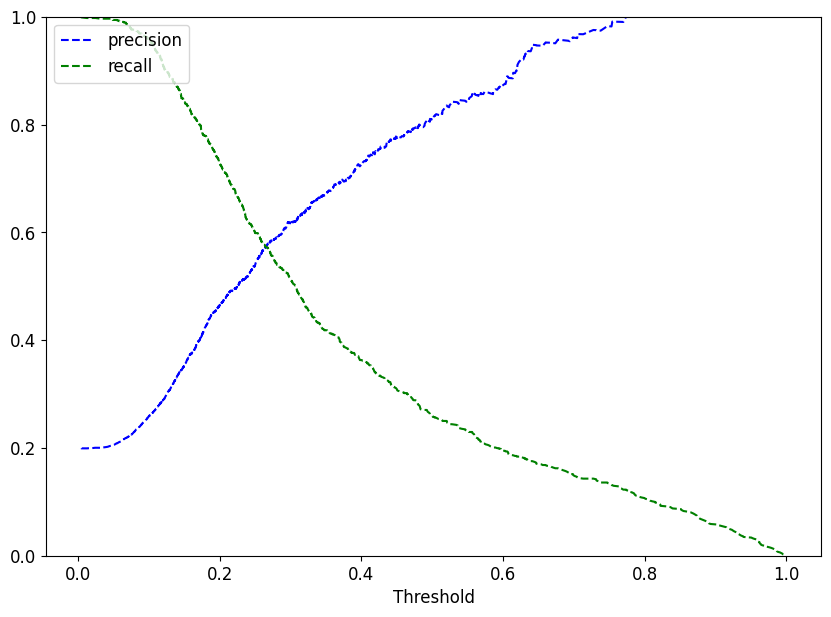

In [92]:

y_scores_lg = lg.predict_proba(x_train) # predict_proba gives the probability of each observation belonging to each class


precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train, y_scores_lg[:, 1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize = (10, 7))

plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label = 'precision')

plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')

plt.xlabel('Threshold')

plt.legend(loc = 'upper left')

plt.ylim([0, 1])

plt.show()

              precision    recall  f1-score   support

           0       0.91      0.84      0.87      3340
           1       0.51      0.65      0.57       832

    accuracy                           0.81      4172
   macro avg       0.71      0.75      0.72      4172
weighted avg       0.83      0.81      0.81      4172



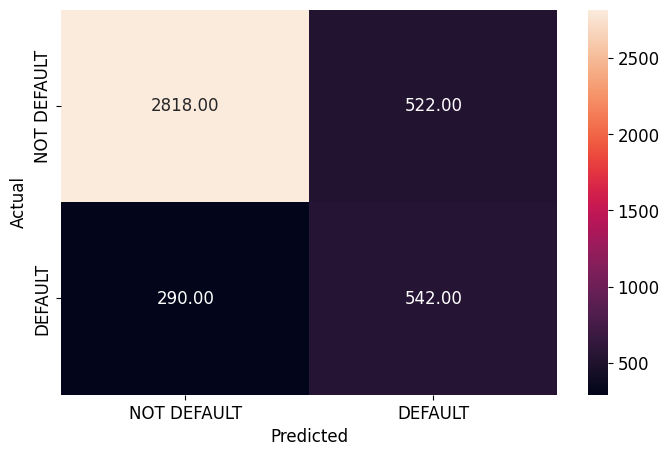

In [93]:
optimal_threshold1 = .23

y_pred_train_LgOT = lg.predict_proba(x_train)

metrics_score(y_train, y_pred_train_LgOT[:, 1] > optimal_threshold1)

              precision    recall  f1-score   support

           0       0.90      0.86      0.88      1431
           1       0.52      0.60      0.56       357

    accuracy                           0.81      1788
   macro avg       0.71      0.73      0.72      1788
weighted avg       0.82      0.81      0.81      1788



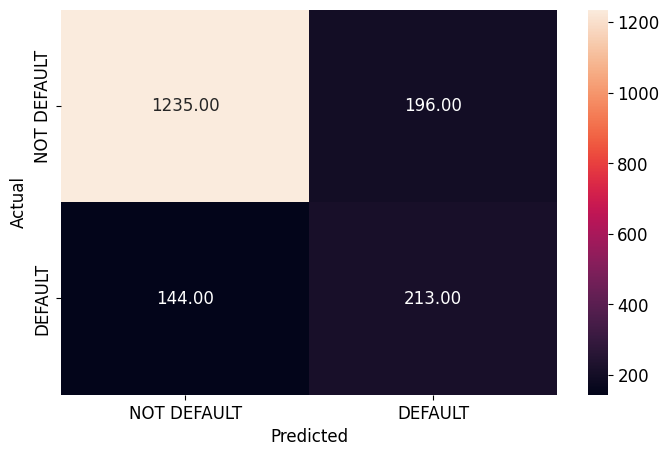

In [94]:
optimal_threshold1 = .23

y_pred_test_LgOT = lg.predict_proba(x_test)

metrics_score(y_test, y_pred_test_LgOT[:, 1] > optimal_threshold1)

**The precision for the positive class is 0.52, which means that out of all the observations classified as positive, only 52% were actually positive. The recall for the positive class is 0.60, which means that out of all the positive observations, only 60% were correctly identified by the model.** 

**We will use GridSearchCV to search for the best hyperparameters for our logistic regression model. This method will allow us to specify a range of values for each hyperparameter, and the GridSearchCV object will systematically test different combinations of these values to find the set of hyperparameters that produce the best results. Specifically, we will define a parameter grid to search over, which includes different penalty types, regularization strengths, solver algorithms, and class weights. We will then create a GridSearchCV object with our logistic regression model and the parameter grid, and fit it on our resampled training data. Finally, we will print the best hyperparameters found by GridSearchCV and create a new logistic regression model with these hyperparameters to train on the resampled data.**

In [95]:

# Define the parameter grid to search over
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'class_weight': ['balanced', None]
}

# Create a GridSearchCV object with the logistic regression model, parameter grid, and cross-validation
grid_search = GridSearchCV(lg, param_grid, cv=10)

# Fit the GridSearchCV object on the resampled training data
grid_search.fit(x_train, y_train)

# Print the best parameters found by GridSearchCV
print("Best parameters: ", grid_search.best_params_)

Best parameters:  {'C': 0.001, 'class_weight': None, 'penalty': 'none', 'solver': 'newton-cg'}


In [96]:
# Create a logistic regression model with the best hyperparameters
logreg = LogisticRegression(C=0.1, class_weight='balanced', penalty='l2', solver='saga')

# Train the model on the resampled training data
logreg.fit(x_train, y_train)

LogisticRegression(C=0.1, class_weight='balanced', solver='saga')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



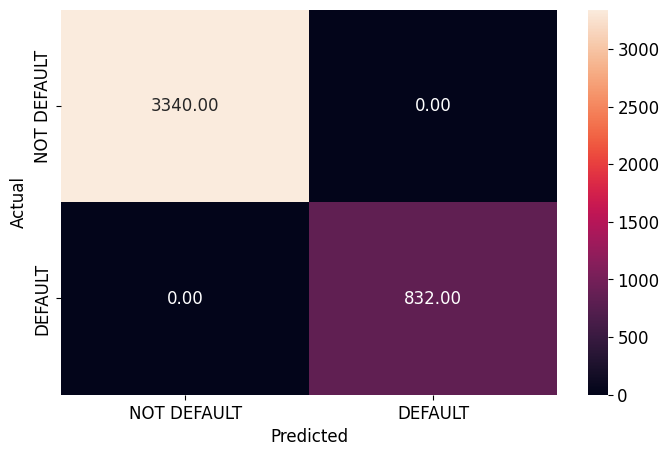

In [97]:
optimal_threshold = .21
y_pred_train_LgGS = (y_train > optimal_threshold).astype(int)
metrics_score(y_train, y_pred_train_LgGS)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1431
           1       1.00      1.00      1.00       357

    accuracy                           1.00      1788
   macro avg       1.00      1.00      1.00      1788
weighted avg       1.00      1.00      1.00      1788



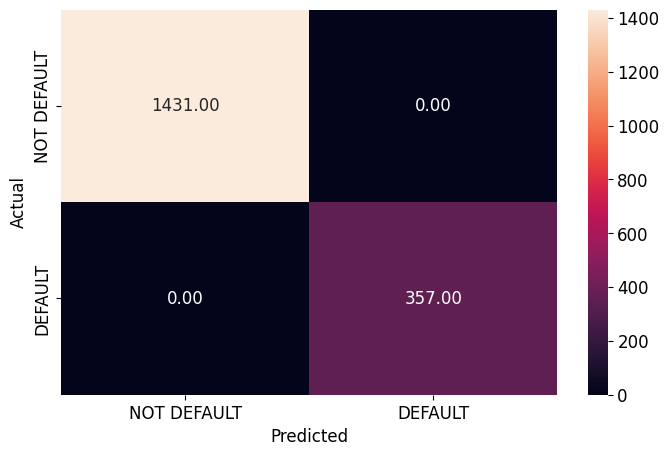

In [98]:
# Classify the test set based on the optimal threshold obtained earlier
y_pred_test_LgGS = (y_test > optimal_threshold).astype(int)
metrics_score(y_test, y_pred_test_LgGS)

**Our model performs similarly well on the test set as it did on the training set, we can consider it a successful model. In this case, since the model achieved perfect precision, recall, and f1-score on the test set, we can conclude that it is a strong model. However, it is important to keep in mind that these results may be overfitting to the specific dataset used and may not generalize well to new data. Therefore, it is important to continue monitoring the model's performance.**

# Decision Tree

**When using decision trees, normalization may not be required as decision trees are not sensitive to the scale of the data.**

In [169]:
dataI = dataM.copy()

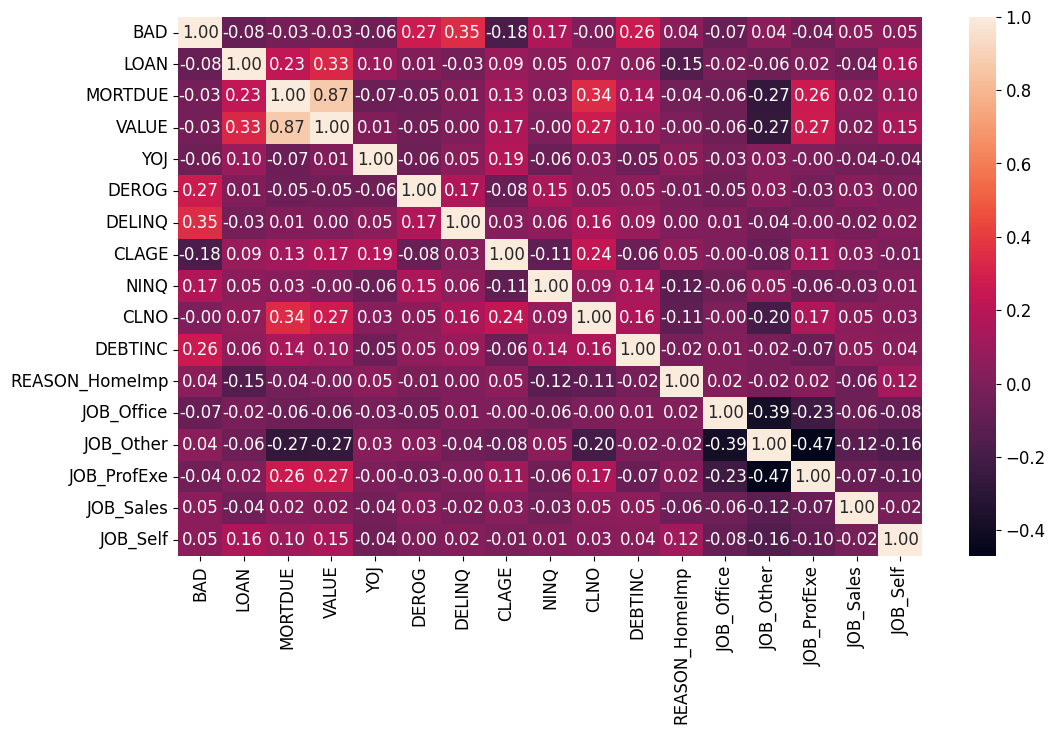

In [170]:
plt.figure(figsize = (12, 7))

sns.heatmap(dataI.corr(), annot = True, fmt = '.2f')

plt.show()

In [171]:

# Separating the target variable and other variables

Y = dataI.BAD

X = dataI.drop(['BAD'], axis = 1)

# Splitting the data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1, stratify = Y)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



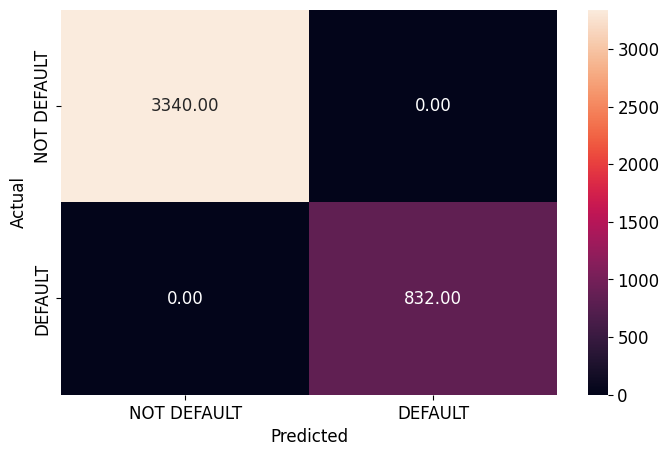

In [172]:
# Fitting the decision tree classifier on the training data
d_tree = DecisionTreeClassifier(class_weight = {0: 0.2, 1: 0.8}, random_state = 42)

d_tree.fit(x_train, y_train)
# Checking performance on the training data
y_pred_train_DT = d_tree.predict(x_train)
metrics_score(y_train, y_pred_train_DT)

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1431
           1       0.89      0.84      0.87       357

    accuracy                           0.95      1788
   macro avg       0.93      0.91      0.92      1788
weighted avg       0.95      0.95      0.95      1788



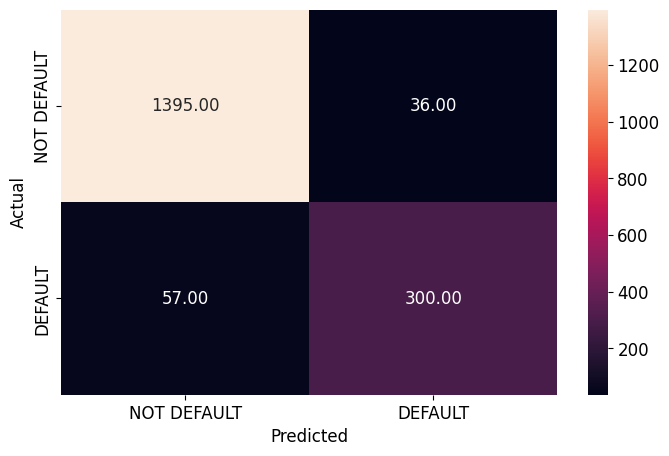

In [173]:
# Checking performance on the testing data
y_pred_test_DT = d_tree.predict(x_test)
metrics_score(y_test, y_pred_test_DT)

In [174]:
# Model Performance on the test data
d_tree_test = model_performance_classification(d_tree,x_test,y_test)

d_tree_test

Precision    Recall  Accuracy
0     0.9268  0.907589  0.947987

**For class 1, the precision is 0.89, which means that of all the samples predicted to be in class 1, 88% of them were actually in class 1. The recall for class 1 is 0.83, which means that of all the samples that were actually in class 1, 84% of them were correctly classified as class 1 by the model.**

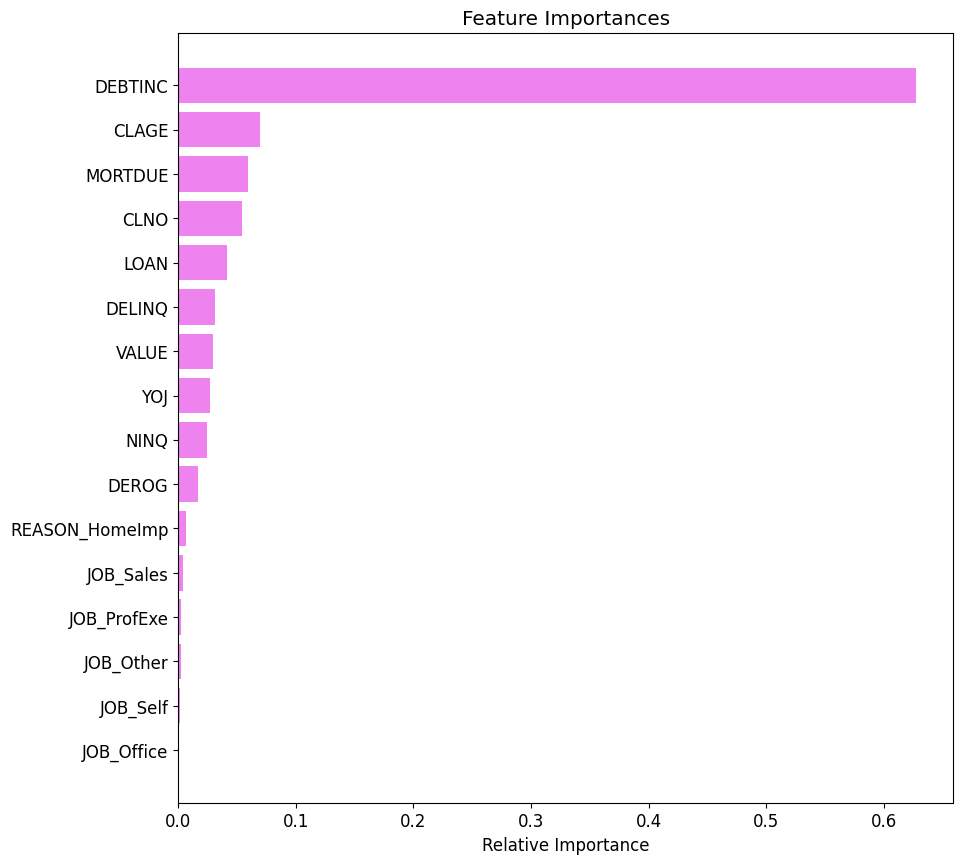

In [183]:
# Plotting the feature importance
importances = d_tree.feature_importances_

indices = np.argsort(importances)

plt.figure(figsize = (10, 10))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [features[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

# Decision Tree - Hyperparameter Tuning

**Hyperparameter tuning is tricky in the sense that there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.**
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.** 
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
**The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.**

**Criterion {“gini”, “entropy”}**

**The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.**

**max_depth** 

**The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.**

**min_samples_leaf**

**The minimum number of samples is required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.**


In [176]:
# Choose the type of classifier 
d_tree_tuned = DecisionTreeClassifier(random_state = 42, class_weight = {0: 0.2, 1: 0.8})

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 10), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(x_train, y_train)

# Set the classifier to the best combination of parameters
d_tree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
d_tree_tuned.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, max_depth=9,
                       min_samples_leaf=10, random_state=42)

              precision    recall  f1-score   support

           0       0.98      0.95      0.97      3340
           1       0.82      0.93      0.87       832

    accuracy                           0.95      4172
   macro avg       0.90      0.94      0.92      4172
weighted avg       0.95      0.95      0.95      4172



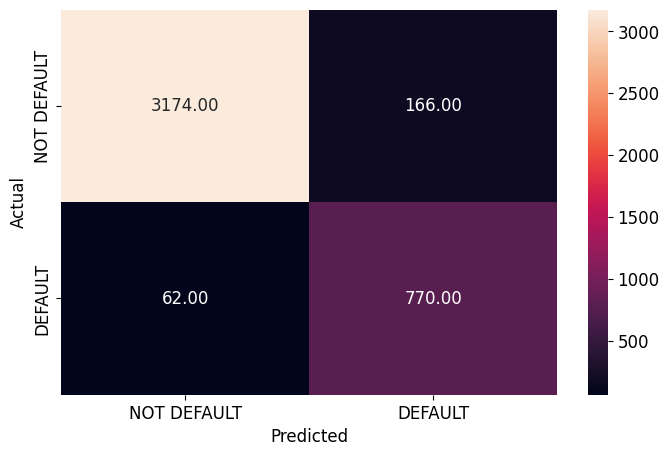

In [177]:
# Checking performance on the training data
y_pred_train_DTGS = d_tree_tuned.predict(x_train)

metrics_score(y_train, y_pred_train_DTGS)

              precision    recall  f1-score   support

           0       0.96      0.93      0.94      1431
           1       0.74      0.84      0.79       357

    accuracy                           0.91      1788
   macro avg       0.85      0.88      0.87      1788
weighted avg       0.92      0.91      0.91      1788



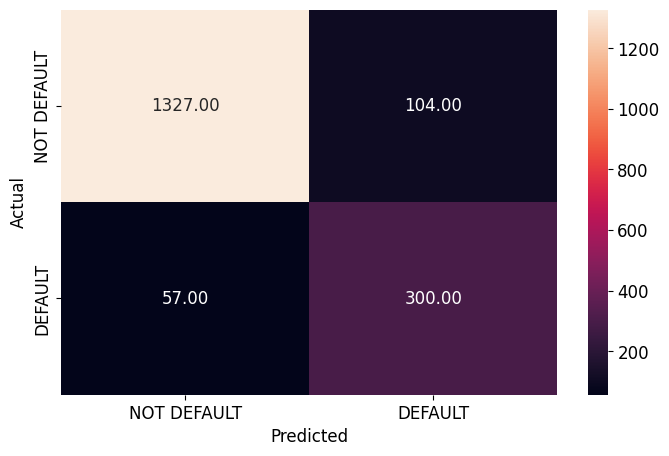

In [178]:
# Checking performance on the testing data
y_pred_test_DTGS = d_tree_tuned.predict(x_test)

metrics_score(y_test, y_pred_test_DTGS)

In [179]:
# Model Performance on the test data
d_tree_tuned_test = model_performance_classification(d_tree_tuned,x_test,y_test)

d_tree_tuned_test

Precision   Recall  Accuracy
0   0.850695  0.88383  0.909955

**The default hyperparameters of the decision tree algorithm work better for the our data.**

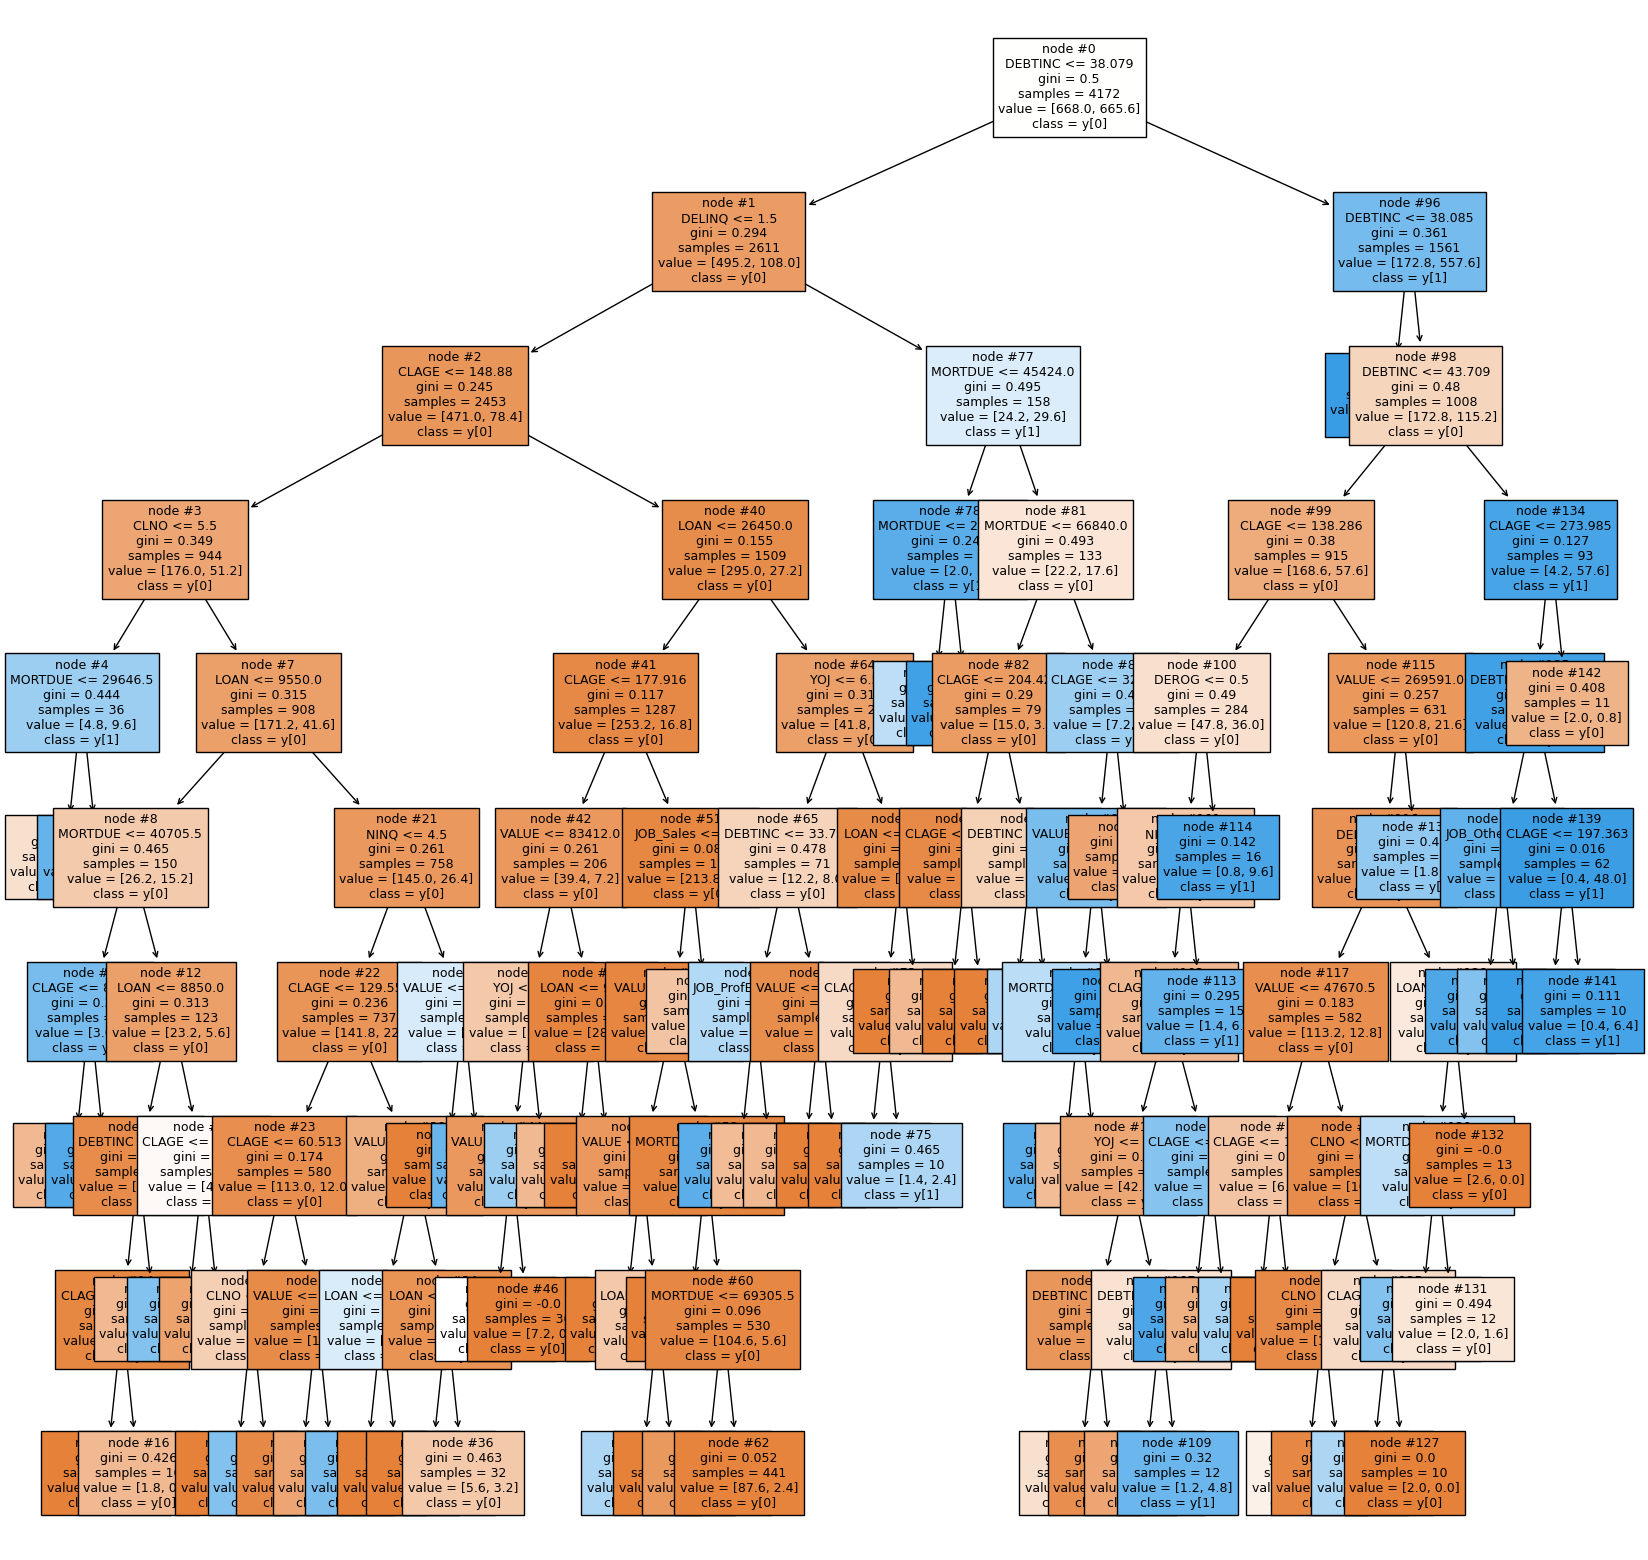

In [180]:
features = list(X.columns)

plt.figure(figsize = (20, 20))

tree.plot_tree(d_tree_tuned, feature_names = features, filled = True, fontsize = 9, node_ids = True, class_names = True)

plt.show()

In [181]:
# Importance of features in the tree building

print (pd.DataFrame(d_tree_tuned.feature_importances_, columns = ["Imp"], index = x_train.columns).sort_values(by = 'Imp', ascending = False))

                     Imp
DEBTINC         0.746040
CLAGE           0.065819
DELINQ          0.034500
MORTDUE         0.034019
VALUE           0.031408
LOAN            0.029151
CLNO            0.019760
YOJ             0.012465
NINQ            0.011319
DEROG           0.010678
JOB_ProfExe     0.002934
JOB_Sales       0.001612
JOB_Other       0.000294
REASON_HomeImp  0.000000
JOB_Office      0.000000
JOB_Self        0.000000


**The output appears to show the importance values of different features for a model. The DEBTINC feature has the highest importance score with 0.746040, which suggests that it is the most important feature in the model. The feature CLAGE has the second-highest importance score with 0.065819, followed by DELINQ with 0.034500. The least important feature seems to be JOB_Office and JOB_Self with importance score of 0.0.**

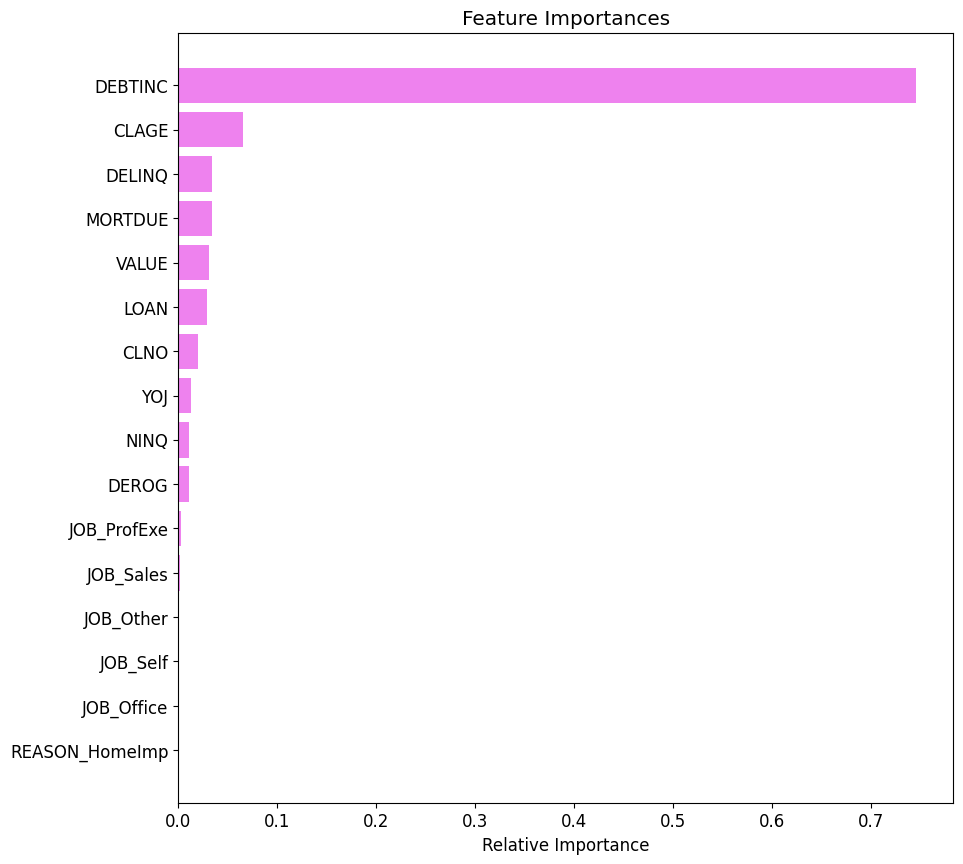

In [182]:
# Plotting the feature importance
importances = d_tree_tuned.feature_importances_

indices = np.argsort(importances)

plt.figure(figsize = (10, 10))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [features[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

# Building a Random Forest Classifier

**Random Forest is a bagging algorithm where the base models are Decision Trees. Samples are taken from the training data and on each sample a decision tree makes a prediction.**

**The results from all the decision trees are combined together and the final prediction is made using voting or averaging.**

In [208]:
# Fitting the random forest tree classifier on the training data
rf_estimator = RandomForestClassifier(class_weight = {0: 0.20, 1: 0.80}, random_state = 42)

rf_estimator.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=42)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



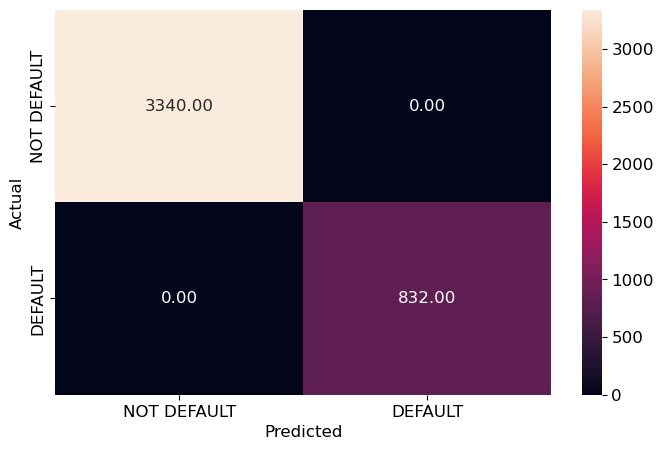

In [209]:
# Checking performance on the training data
y_pred_train_RF = rf_estimator.predict(x_train)

metrics_score(y_train,y_pred_train_RF)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1431
           1       0.99      0.80      0.88       357

    accuracy                           0.96      1788
   macro avg       0.97      0.90      0.93      1788
weighted avg       0.96      0.96      0.96      1788



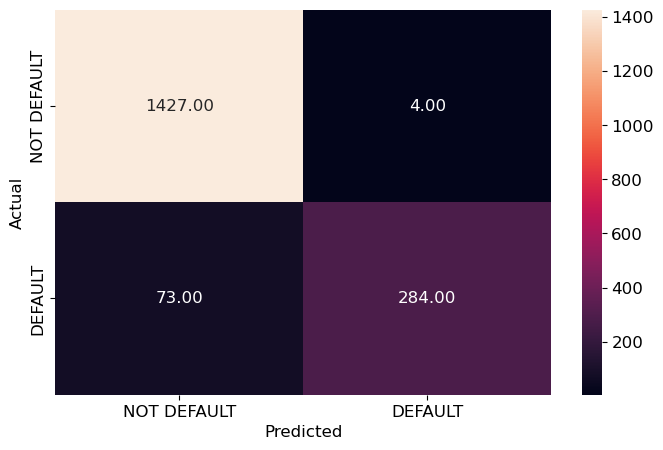

In [210]:
# Checking performance on the testing data
y_pred_test_RF = rf_estimator.predict(x_test)

metrics_score(y_test,y_pred_test_RF)

In [211]:
# Model Performance on the test data
rf_estimator_test = model_performance_classification(rf_estimator,x_test,y_test)

rf_estimator_test

Precision    Recall  Accuracy
0   0.968722  0.896361  0.956935

**The model predicted 99% of the defaults correctly (precision), and captured 80% of the actual defaults (recall), resulting in an F1-score of 0.88.**

# Random Forest Classifier Hyperparameter Tuning

In [212]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(criterion = "entropy", random_state = 42)

# Grid of parameters to choose from
parameters = {"n_estimators": [100, 110, 120],
    "max_depth": [5, 6, 7],
    "max_features": [0.8, 0.9, 1]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(x_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

In [213]:
# Fitting the best algorithm to the training data
rf_estimator_tuned.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=7, max_features=0.8,
                       random_state=42)

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      3340
           1       1.00      0.80      0.89       832

    accuracy                           0.96      4172
   macro avg       0.98      0.90      0.93      4172
weighted avg       0.96      0.96      0.96      4172



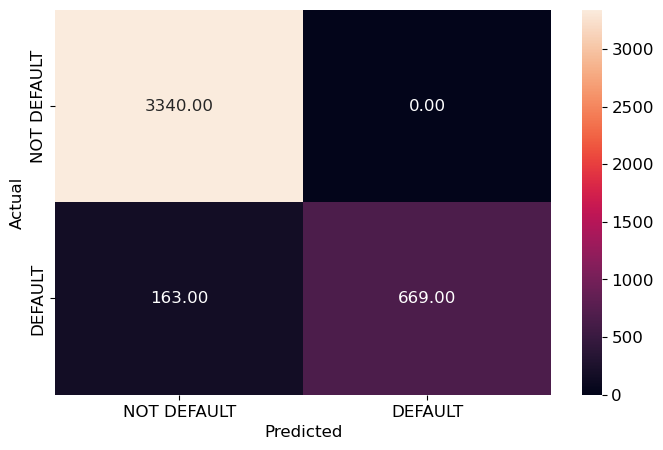

In [214]:
# Checking performance on the training data
y_pred_train_RFGS = rf_estimator_tuned.predict(x_train)

metrics_score(y_train, y_pred_train_RFGS)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1431
           1       1.00      0.75      0.85       357

    accuracy                           0.95      1788
   macro avg       0.97      0.87      0.91      1788
weighted avg       0.95      0.95      0.95      1788



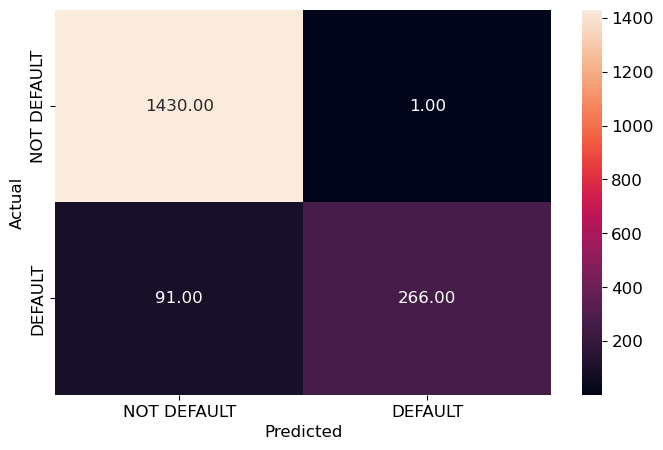

In [215]:
# Checking performance on the testing data
y_pred_test_RFGS = rf_estimator_tuned.predict(x_test)

metrics_score(y_test,y_pred_test_RFGS)

In [216]:
# Model Performance on the test data
rf_estimator_tuned_test = model_performance_classification(rf_estimator_tuned,x_test,y_test)

rf_estimator_tuned_test

Precision  Recall  Accuracy
0   0.968213  0.8722  0.948546

**The default hyperparameters of the random forest algorithm work better for the our data, as the recall has decreased**

In [217]:
# Choose the type of classifier 
rf_estimator_tuned = RandomForestClassifier(criterion = "entropy", random_state = 42)

# Grid of parameters to choose from
parameters = {"n_estimators": [110, 120],
    "max_depth": [6, 7],
    "min_samples_leaf": [20, 25],
    "max_features": [0.8, 0.9],
    "max_samples": [0.9, 1],
    "class_weight": ["balanced",{0: 0.3, 1: 0.7}]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search on the training data using scorer=scorer and cv=5
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(x_train, y_train)

# Save the best estimator to variable rf_estimator_tuned
rf_estimator_tuned_2 = grid_obj.fit(x_train, y_train)

#Fit the best estimator to the training data'
rf_estimator_tuned_2 = grid_obj.best_estimator_

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      3340
           1       0.94      0.82      0.88       832

    accuracy                           0.95      4172
   macro avg       0.95      0.90      0.92      4172
weighted avg       0.95      0.95      0.95      4172



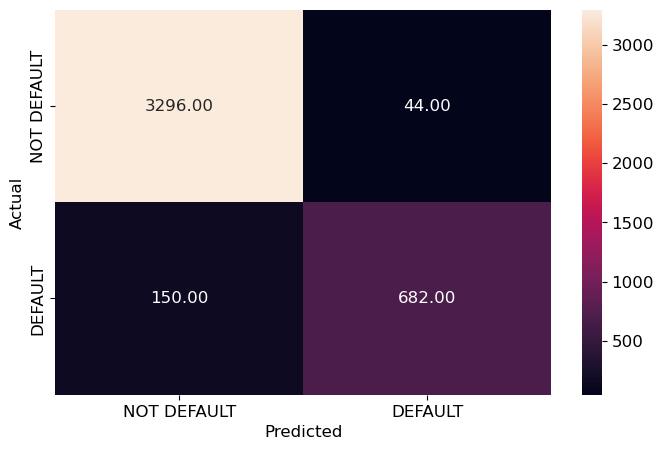

In [218]:
# Checking performance on the training data
y_pred_train_RFGS_2 = rf_estimator_tuned_2.predict(x_train)

metrics_score(y_train, y_pred_train_RFGS_2)

**And again the default hyperparameters of the random forest algorithm work better for the our data**

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1431
           1       0.90      0.74      0.81       357

    accuracy                           0.93      1788
   macro avg       0.92      0.86      0.89      1788
weighted avg       0.93      0.93      0.93      1788



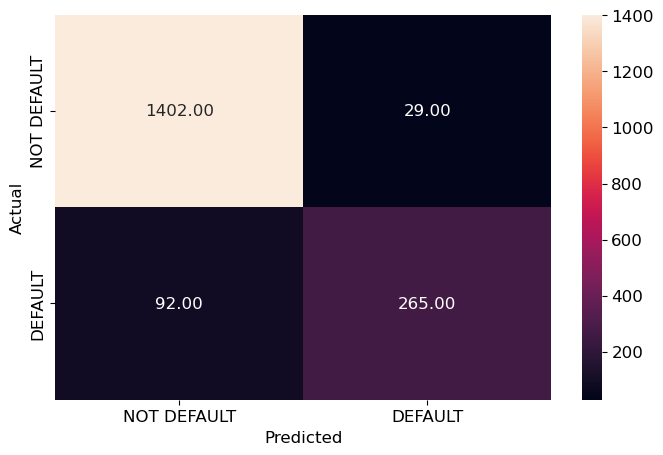

In [219]:
# Checking performance on the test data
y_pred_test_RFGS_2 = rf_estimator_tuned_2.predict(x_test)

metrics_score(y_test, y_pred_test_RFGS_2)

In [220]:
# Model Performance on the test data
rf_estimator_tuned_2_test = model_performance_classification(rf_estimator_tuned_2,x_test,y_test)

rf_estimator_tuned_2_test

Precision    Recall  Accuracy
0    0.91989  0.861016  0.932327

**As with logistic regression, the most important feature is the debt-to-income ratio.**

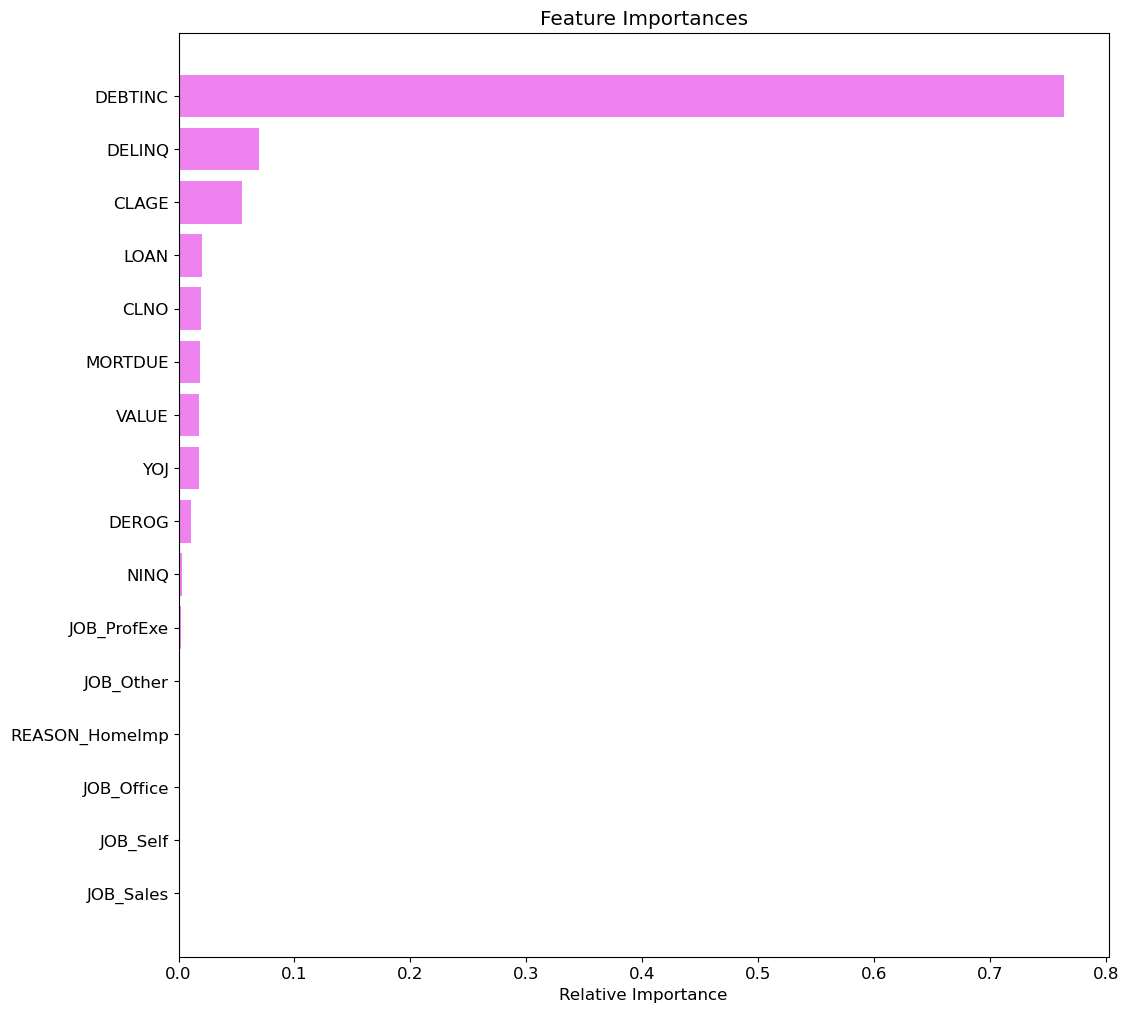

In [221]:
importances = rf_estimator_tuned_2.feature_importances_

indices = np.argsort(importances)

feature_names = list(X.columns)

plt.figure(figsize = (12, 12))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

# CatBoostClassifier, LightGBM Classifier, XGBClassifier

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3340
           1       1.00      0.92      0.96       832

    accuracy                           0.98      4172
   macro avg       0.99      0.96      0.97      4172
weighted avg       0.98      0.98      0.98      4172



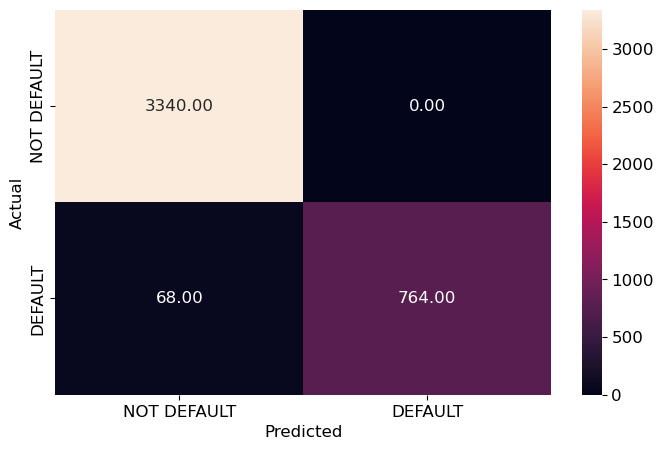

In [222]:

# Create CatBoost classifier
catboost = CatBoostClassifier(random_state=42, verbose=0)

# Fit the model
catboost.fit(x_train, y_train)

# Make predictions on train set
y_pred_train_CB = catboost.predict(x_train)

# Compute metrics
metrics_score(y_train, y_pred_train_CB)

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1431
           1       0.99      0.81      0.89       357

    accuracy                           0.96      1788
   macro avg       0.97      0.90      0.93      1788
weighted avg       0.96      0.96      0.96      1788



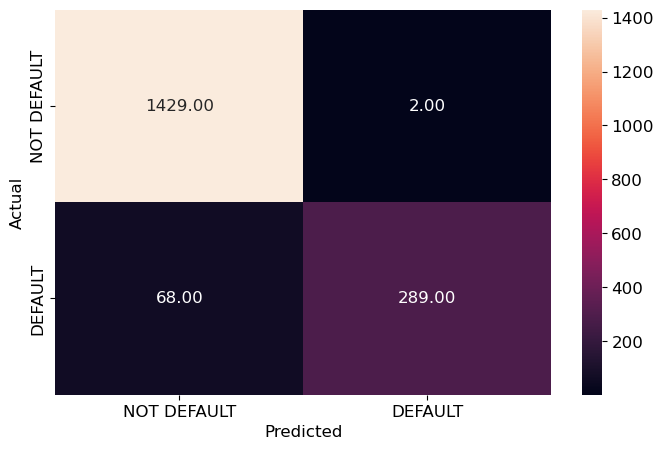

In [223]:
# Make predictions on train set
y_pred_test_CB = catboost.predict(x_test)

# Compute metrics
metrics_score(y_test, y_pred_test_CB)

In [224]:
# Model Performance on the test data
catboost_test = model_performance_classification(catboost,x_test,y_test)

catboost_test

Precision    Recall  Accuracy
0   0.973851  0.904063   0.96085

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



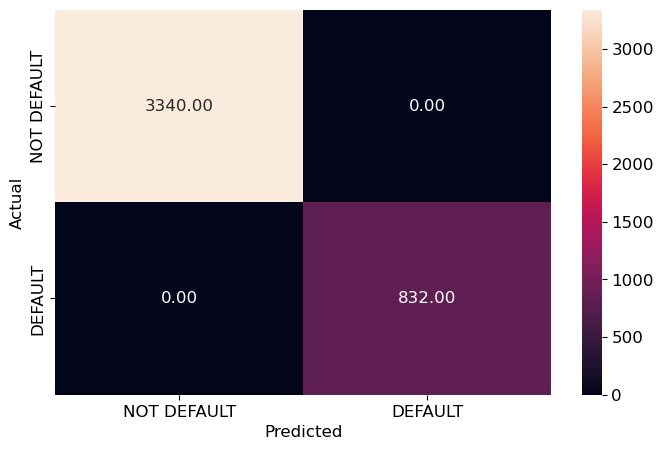

In [225]:

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = make_scorer(recall_score, pos_label=1)


kfold = KFold(n_splits=5, shuffle=True, random_state=42)
# CatBoost Classifier
catboost = CatBoostClassifier(random_state=42, verbose=0)

# Grid of parameters to choose from
params_catboost = {
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "iterations": [50, 100, 200, 300, 500],
    "depth": [2, 3, 5, 7, 9],
    "l2_leaf_reg": [1, 3, 5, 7, 9],
    "border_count": [32, 64, 128, 254],
    "bagging_temperature": [0, 0.1, 0.2, 0.3],
}

# Run the randomized search
random_obj = RandomizedSearchCV(catboost, params_catboost, scoring='recall', cv=kfold, n_jobs=-1, n_iter=100, random_state=42)
random_obj = random_obj.fit(x_train, y_train)

# Set the classifier to the best combination of parameters
catboost_tuned = random_obj.best_estimator_

# Fit the model
catboost_tuned.fit(x_train, y_train)

y_pred_train_CBRS = catboost_tuned.predict(x_train)
metrics_score(y_train, y_pred_train_CBRS)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1431
           1       0.99      0.82      0.90       357

    accuracy                           0.96      1788
   macro avg       0.97      0.91      0.94      1788
weighted avg       0.96      0.96      0.96      1788



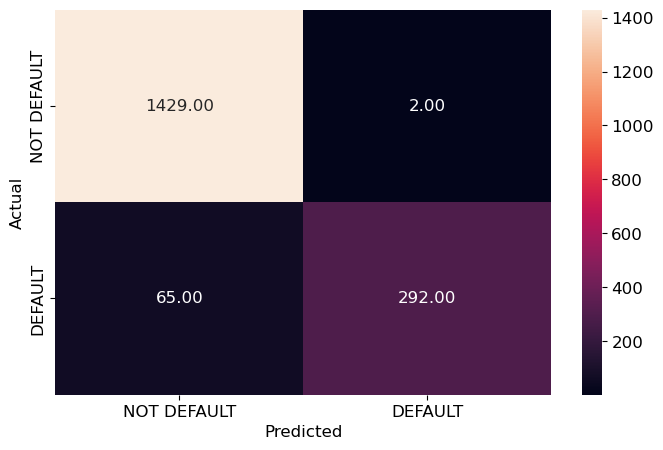

In [226]:
y_pred_test_CBRS = catboost_tuned.predict(x_test)
# Model Performance on the test data

metrics_score(y_test, y_pred_test_CBRS)

In [227]:
# Model Performance on the test data
catboost_tuned_test = model_performance_classification(catboost_tuned,x_test,y_test)

catboost_tuned_test

Precision    Recall  Accuracy
0   0.974845  0.908265  0.962528

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



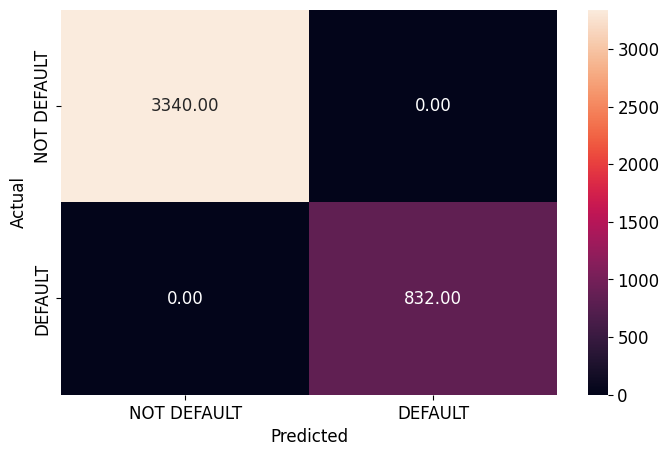

In [228]:
import lightgbm as lgb

# LightGBM Classifier
lgbm = lgb.LGBMClassifier(random_state=42)

# Fit the model
lgbm.fit(x_train, y_train)

# Make predictions on train set
y_pred_train_lgbm = lgbm.predict(x_train)

# Compute metrics
metrics_score(y_train, y_pred_train_lgbm)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1431
           1       1.00      0.82      0.90       357

    accuracy                           0.96      1788
   macro avg       0.98      0.91      0.94      1788
weighted avg       0.97      0.96      0.96      1788



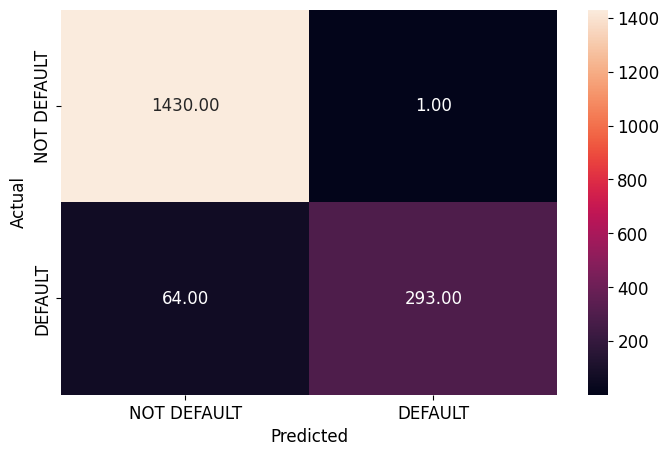

In [229]:
y_pred_test_lgbm = lgbm.predict(x_test)

# Compute metrics
metrics_score(y_test, y_pred_test_lgbm)

In [230]:
# Model Performance on the test data
lgbm_test = model_performance_classification(lgbm,x_test,y_test)

lgbm_test

Precision    Recall  Accuracy
0    0.97688  0.910015  0.963647

In [198]:
# Separating the target variable and other variables

YL = dataLGB.BAD

XL = dataLGB.drop(['BAD'], axis = 1)

# Splitting the data
xl_train, xl_test, yl_train, yl_test = train_test_split(XL, YL, test_size = 0.3, random_state = 1, stratify = Y)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



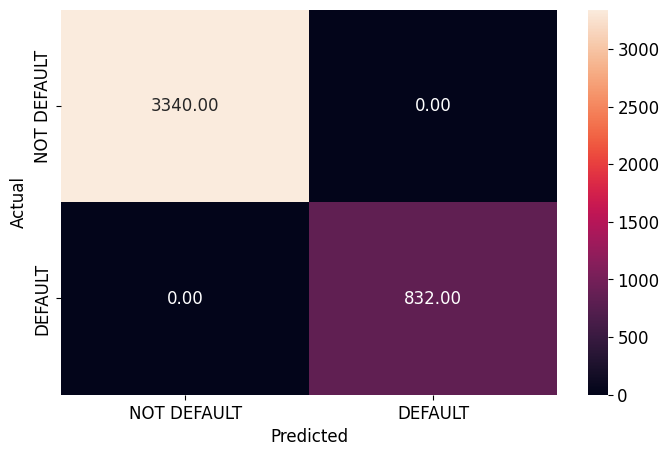

In [199]:
# LightGBM Classifier
lgbmCat = lgb.LGBMClassifier(random_state=42)

# Fit the model
lgbmCat.fit(xl_train, yl_train)

# Make predictions on train set
yl_pred_train_lgbm = lgbmCat.predict(xl_train)

# Compute metrics
metrics_score(yl_train, yl_pred_train_lgbm)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1431
           1       0.99      0.82      0.90       357

    accuracy                           0.96      1788
   macro avg       0.98      0.91      0.94      1788
weighted avg       0.96      0.96      0.96      1788



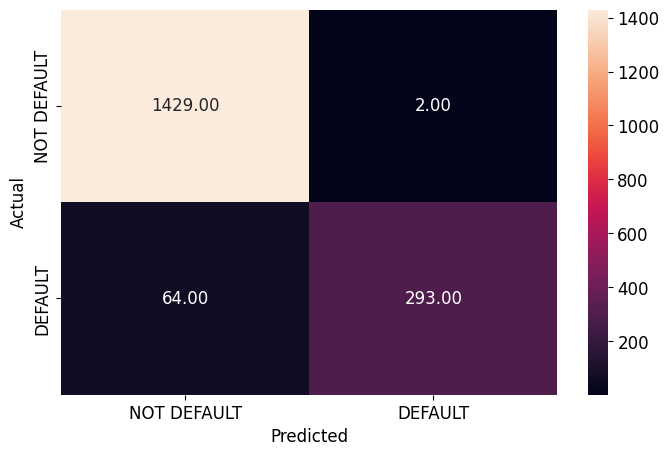

In [200]:
yl_pred_test_lgbm = lgbmCat.predict(xl_test)

# Compute metrics
metrics_score(yl_test, yl_pred_test_lgbm)

In [202]:
# Model Performance on the test data
lgbm_test_cat = model_performance_classification(lgbmCat,xl_test,yl_test)

lgbm_test_cat

Precision    Recall  Accuracy
0   0.975177  0.909665  0.963087

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



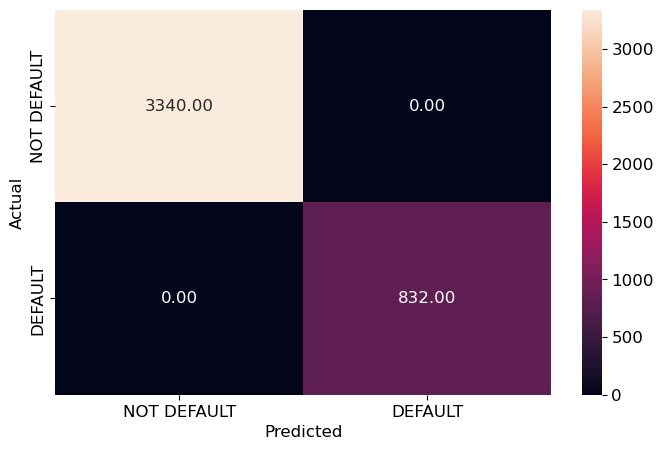

In [231]:

# LightGBM Classifier
lgbm = lgb.LGBMClassifier(random_state=42)

# Grid of parameters to choose from
params_lgbm = {
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "n_estimators": [50, 100, 200, 300, 500],
    "max_depth": [2, 3, 5, 7, 9],
    "num_leaves": [15, 31, 63, 127],
    "min_child_samples": [10, 20, 30, 50],
    "subsample": [0.5, 0.6, 0.8, 1.0],
    "colsample_bytree": [0.5, 0.6, 0.8, 1.0],
}

# Run the randomized search
random_obj = RandomizedSearchCV(lgbm, params_lgbm, scoring='recall', cv=kfold, n_jobs=-1, n_iter=100, random_state=42)

random_obj = random_obj.fit(x_train, y_train)

# Set the classifier to the best combination of parameters
lgbm_tuned = random_obj.best_estimator_

# Fit the model
lgbm_tuned.fit(x_train, y_train)

y_pred_train_LGBMRS = lgbm_tuned.predict(x_train)
metrics_score(y_train, y_pred_train_LGBMRS)


              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1431
           1       0.99      0.82      0.89       357

    accuracy                           0.96      1788
   macro avg       0.97      0.91      0.94      1788
weighted avg       0.96      0.96      0.96      1788



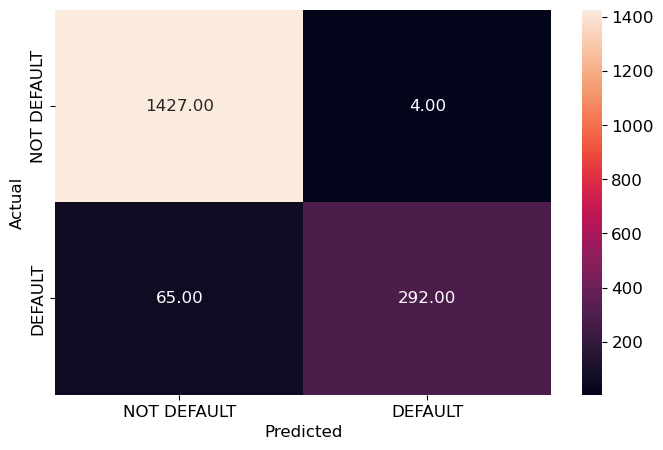

In [232]:
y_pred_test_LGBMRS = lgbm_tuned.predict(x_test)
# Model Performance on the test data

metrics_score(y_test, y_pred_test_LGBMRS)


In [233]:
# Model Performance on the test data
lgbm_tuned_test = model_performance_classification(lgbm_tuned,x_test,y_test)

lgbm_tuned_test

Precision    Recall  Accuracy
0    0.97146  0.907566  0.961409

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



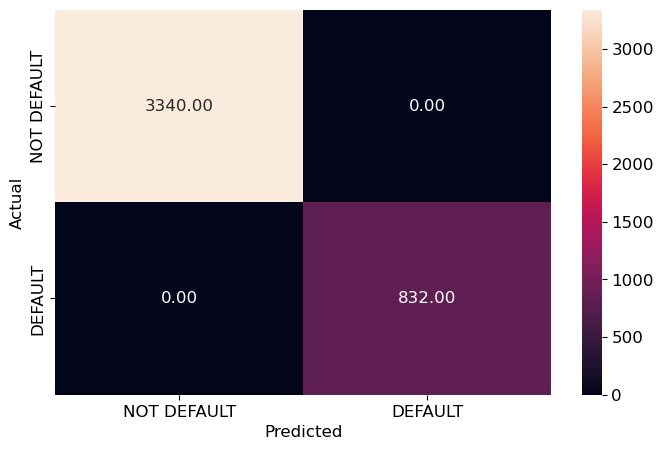

In [234]:

# Importing the XGBClassifier from the xgboost library
from xgboost import XGBClassifier

# XGBoost Classifier
xgb = XGBClassifier(random_state=42, eval_metric='logloss')


# Fit the model
xgb.fit(x_train, y_train)

y_pred_train_XGB = xgb.predict(x_train)
metrics_score(y_train, y_pred_train_XGB)


              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1431
           1       0.99      0.81      0.89       357

    accuracy                           0.96      1788
   macro avg       0.97      0.91      0.93      1788
weighted avg       0.96      0.96      0.96      1788



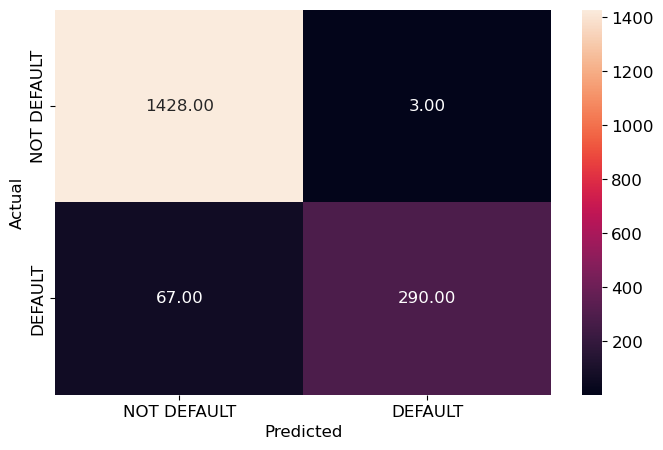

In [235]:
y_pred_test_XGB = xgb.predict(x_test)
# Model Performance on the test data
metrics_score(y_test, y_pred_test_XGB)


In [236]:
# Model Performance on the test data
xgb_test = model_performance_classification(xgb,x_test,y_test)

xgb_test

Precision    Recall  Accuracy
0   0.972473  0.905114   0.96085

**RandomUnderSampler works by randomly removing samples from the majority class until the class distribution becomes balanced. This can improve the model's ability to detect patterns and make accurate predictions for the minority class.**
**It is often used in scenarios where the dataset has an imbalanced class distribution, which means that one class has significantly more samples than the other(s).** 

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       832
           1       1.00      0.98      0.99       832

    accuracy                           0.99      1664
   macro avg       0.99      0.99      0.99      1664
weighted avg       0.99      0.99      0.99      1664



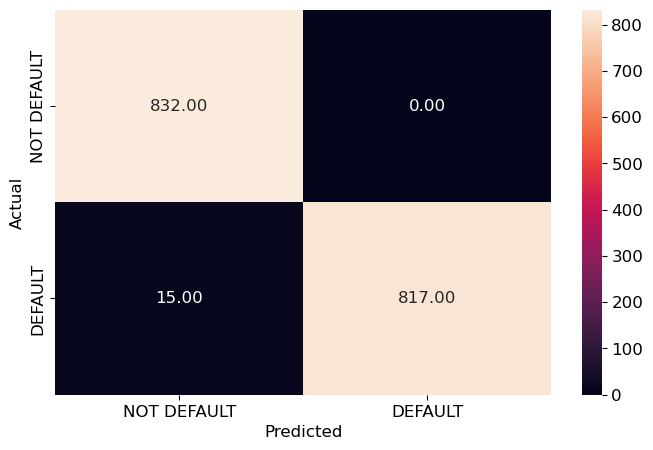

In [237]:

# undersampling
under_sampler = RandomUnderSampler(random_state=42)
x_train_under, y_train_under = under_sampler.fit_resample(x_train, y_train)

# LightGBM Classifier
lgbm = lgb.LGBMClassifier(random_state=42)

# Grid of parameters to choose from
params_lgbm = {
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "n_estimators": [50, 100, 200, 300, 500],
    "max_depth": [2, 3, 5, 7, 9],
    "num_leaves": [15, 31, 63, 127],
    "min_child_samples": [10, 20, 30, 50],
    "subsample": [0.5, 0.6, 0.8, 1.0],
    "colsample_bytree": [0.5, 0.6, 0.8, 1.0],
}

# Run the randomized search
random_obj = RandomizedSearchCV(lgbm, params_lgbm, scoring='recall', cv=kfold, n_jobs=-1, n_iter=100, random_state=42)

random_obj = random_obj.fit(x_train_under, y_train_under)

# Set the classifier to the best combination of parameters
lgbm_tuned_under = random_obj.best_estimator_

# Fit the model
lgbm_tuned_under.fit(x_train_under, y_train_under)

y_pred_train_LGBMUnder = lgbm_tuned_under.predict(x_train_under)
metrics_score(y_train_under, y_pred_train_LGBMUnder)


# Model Performance on the test data
#lgbm_perf_test = model_performance_classification(lgbm_tuned, x_test, y_test)

#print(lgbm_perf_test)

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1431
           1       0.80      0.86      0.83       357

    accuracy                           0.93      1788
   macro avg       0.88      0.90      0.89      1788
weighted avg       0.93      0.93      0.93      1788



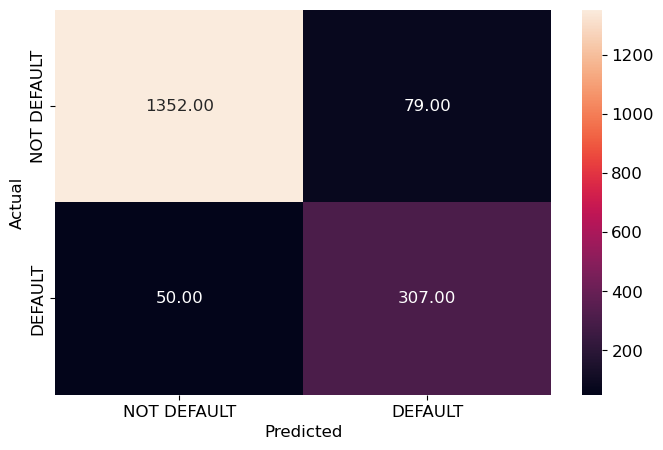

In [238]:
y_pred_test_LGBMUnder = lgbm_tuned_under.predict(x_test)
metrics_score(y_test, y_pred_test_LGBMUnder)


In [239]:
# Model Performance on the test data
lgbm_tuned_under_test = model_performance_classification(lgbm_tuned_under,x_test,y_test)

lgbm_tuned_under_test

Precision    Recall  Accuracy
0   0.879837  0.902369  0.927852

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       832
           1       1.00      1.00      1.00       832

    accuracy                           1.00      1664
   macro avg       1.00      1.00      1.00      1664
weighted avg       1.00      1.00      1.00      1664



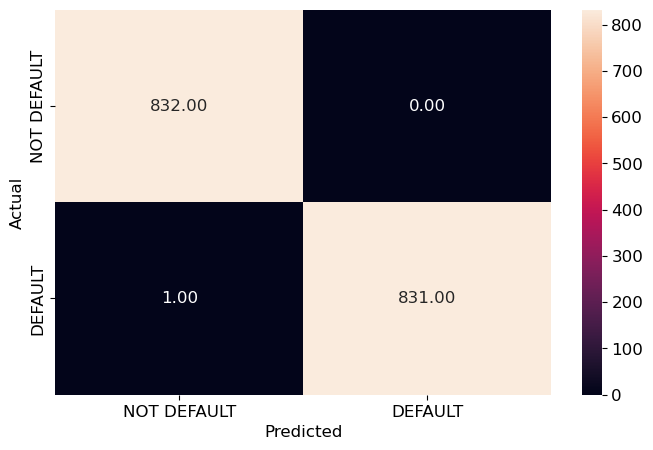

In [240]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
# CatBoost Classifier
catboost = CatBoostClassifier(random_state=42, verbose=0)

# Grid of parameters to choose from
params_catboost = {
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "iterations": [50, 100, 200, 300, 500],
    "depth": [2, 3, 5, 7, 9],
    "l2_leaf_reg": [1, 3, 5, 7, 9],
    "border_count": [32, 64, 128, 254],
    "bagging_temperature": [0, 0.1, 0.2, 0.3],
}

# Run the randomized search
random_obj = RandomizedSearchCV(catboost, params_catboost, scoring='recall', cv=kfold, n_jobs=-1, n_iter=100, random_state=42)
random_obj = random_obj.fit(x_train_under, y_train_under)

# Set the classifier to the best combination of parameters
catboost_tuned_under = random_obj.best_estimator_

# Fit the model
catboost_tuned_under.fit(x_train_under, y_train_under)

y_pred_train_CBUnder = catboost_tuned_under.predict(x_train_under)
metrics_score(y_train_under, y_pred_train_CBUnder)


              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1431
           1       0.87      0.85      0.86       357

    accuracy                           0.95      1788
   macro avg       0.92      0.91      0.91      1788
weighted avg       0.94      0.95      0.94      1788



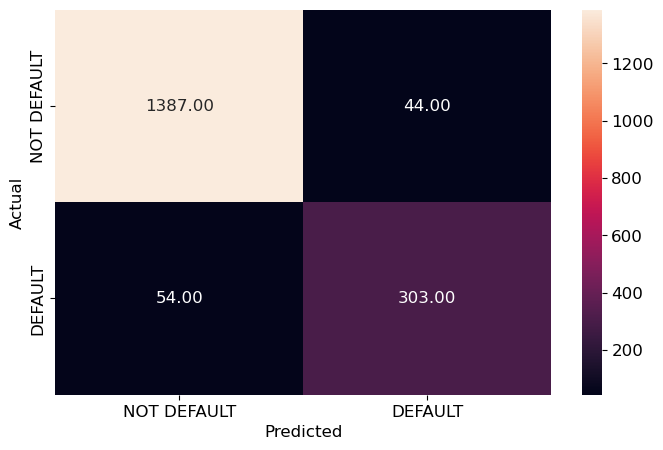

In [241]:

y_pred_test_CBUnder = catboost_tuned_under.predict(x_test)
metrics_score(y_test, y_pred_test_CBUnder)

In [242]:
# Model Performance on the test data
catboost_tuned_under_test = model_performance_classification(catboost_tuned_under,x_test,y_test)

catboost_tuned_under_test

Precision    Recall  Accuracy
0   0.917862  0.908996   0.94519

In [243]:
# Oversampling
over_sampler = RandomOverSampler(sampling_strategy=0.8, random_state=42)
x_train_over, y_train_over = over_sampler.fit_resample(x_train, y_train)


In [445]:
# Oversampling
over_sampler = RandomOverSampler(sampling_strategy=0.8, random_state=42)
xl_train_over, yl_train_over = over_sampler.fit_resample(xl_train, yl_train)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00      2672

    accuracy                           1.00      6012
   macro avg       1.00      1.00      1.00      6012
weighted avg       1.00      1.00      1.00      6012



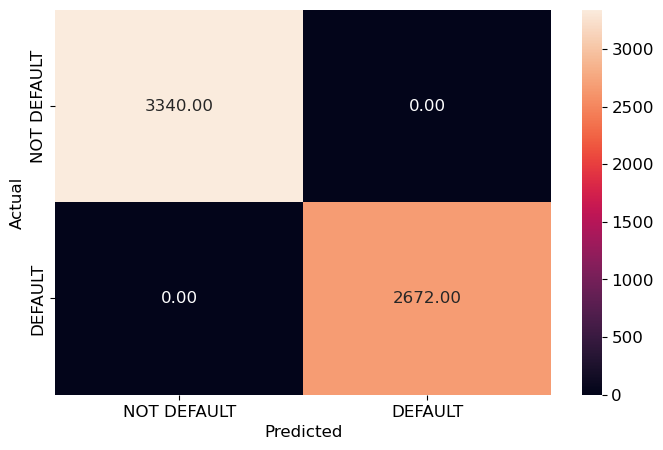

In [244]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
# CatBoost Classifier
catboost = CatBoostClassifier(random_state=42, verbose=0)

# Grid of parameters to choose from
params_catboost = {
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "iterations": [50, 100, 200, 300, 500],
    "depth": [2, 3, 5, 7, 9],
    "l2_leaf_reg": [1, 3, 5, 7, 9],
    "border_count": [32, 64, 128, 254],
    "bagging_temperature": [0, 0.1, 0.2, 0.3],
}

# Run the randomized search
random_obj = RandomizedSearchCV(catboost, params_catboost, scoring='recall', cv=kfold, n_jobs=-1, n_iter=100, random_state=42)
random_obj = random_obj.fit(x_train_over, y_train_over)

# Set the classifier to the best combination of parameters
catboost_tuned_over = random_obj.best_estimator_

# Fit the model
catboost_tuned_over.fit(x_train_over, y_train_over)



y_pred_train_CBOver = catboost_tuned_over.predict(x_train_over)
metrics_score(y_train_over, y_pred_train_CBOver)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1431
           1       0.98      0.83      0.90       357

    accuracy                           0.96      1788
   macro avg       0.97      0.91      0.94      1788
weighted avg       0.96      0.96      0.96      1788



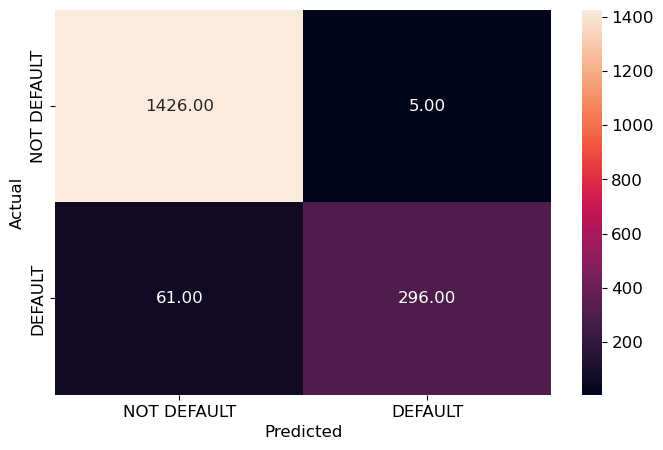

In [245]:
y_pred_test_CBOver = catboost_tuned_over.predict(x_test)
metrics_score(y_test, y_pred_test_CBOver)

In [246]:
# Model Performance on the test data
catboost_tuned_over_test = model_performance_classification(catboost_tuned_over,x_test,y_test)

catboost_tuned_over_test

Precision    Recall  Accuracy
0   0.971183  0.912819  0.963087

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00      2672

    accuracy                           1.00      6012
   macro avg       1.00      1.00      1.00      6012
weighted avg       1.00      1.00      1.00      6012



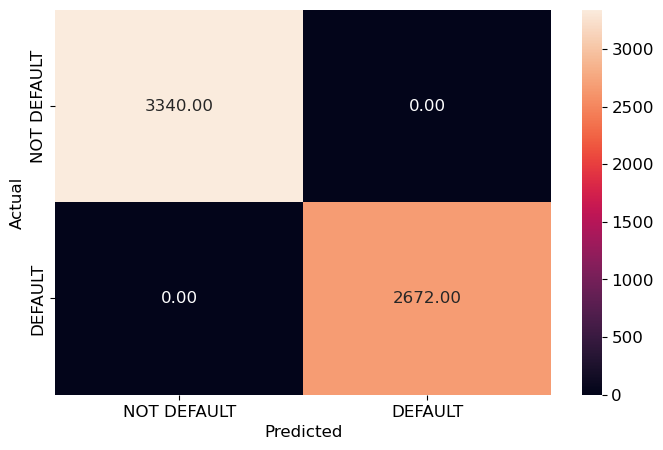

In [447]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
# CatBoost Classifier
catboost = CatBoostClassifier(random_state=42, verbose=0)

# Grid of parameters to choose from
params_catboost = {
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "iterations": [50, 100, 200, 300, 500],
    "depth": [2, 3, 5, 7, 9],
    "l2_leaf_reg": [1, 3, 5, 7, 9],
    "border_count": [32, 64, 128, 254],
    "bagging_temperature": [0, 0.1, 0.2, 0.3],
}

# Run the randomized search
random_obj = RandomizedSearchCV(catboost, params_catboost, scoring='recall', cv=kfold, n_jobs=-1, n_iter=100, random_state=42)
random_objCat = random_obj.fit(xl_train_over, yl_train_over)

# Set the classifier to the best combination of parameters
catboost_tuned_overCat = random_objCat.best_estimator_

# Fit the model
catboost_tuned_overCat.fit(xl_train_over, yl_train_over)

yl_pred_train_CBOverCat = catboost_tuned_overCat.predict(xl_train_over)
metrics_score(yl_train_over, yl_pred_train_CBOverCat)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1431
           1       0.99      0.83      0.91       357

    accuracy                           0.97      1788
   macro avg       0.98      0.92      0.94      1788
weighted avg       0.97      0.97      0.96      1788



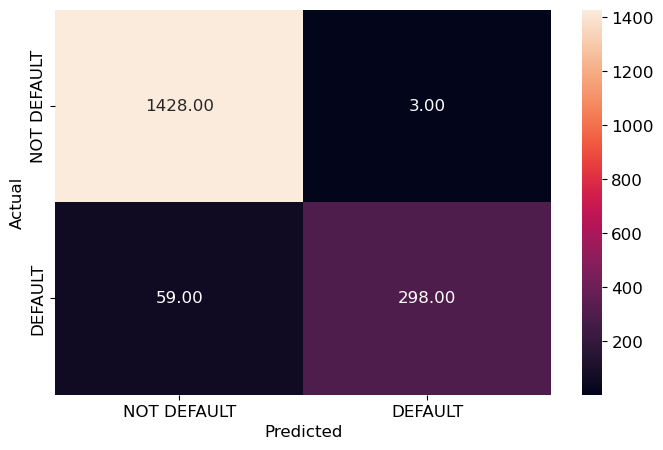

In [448]:
yl_pred_test_CBOverCat = catboost_tuned_overCat.predict(xl_test)
metrics_score(yl_test, yl_pred_test_CBOverCat)

In [451]:
# Model Performance on the test data
catboost_tuned_over_testCat = model_performance_classification(catboost_tuned_overCat,xl_test,yl_test)

catboost_tuned_over_testCat

Precision    Recall  Accuracy
0   0.975178  0.916319  0.965324

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00      2672

    accuracy                           1.00      6012
   macro avg       1.00      1.00      1.00      6012
weighted avg       1.00      1.00      1.00      6012



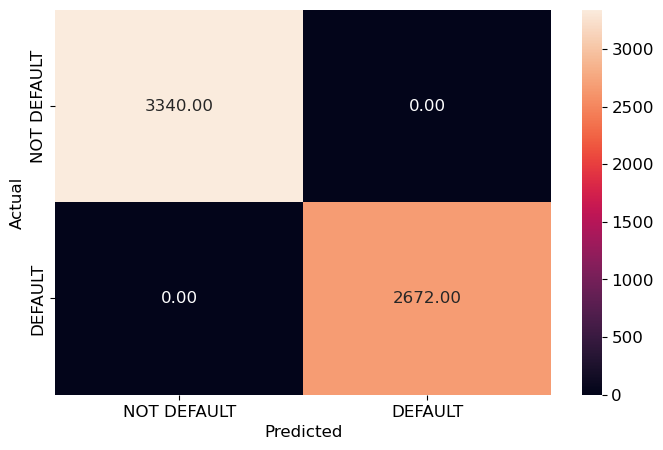

In [247]:
# LightGBM Classifier
lgbm = lgb.LGBMClassifier(random_state=42)

# Grid of parameters to choose from
params_lgbm = {
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "n_estimators": [50, 100, 200, 300, 500],
    "max_depth": [2, 3, 5, 7, 9],
    "num_leaves": [15, 31, 63, 127],
    "min_child_samples": [10, 20, 30, 50],
    "subsample": [0.5, 0.6, 0.8, 1.0],
    "colsample_bytree": [0.5, 0.6, 0.8, 1.0],
}

# Run the randomized search
random_obj = RandomizedSearchCV(lgbm, params_lgbm, scoring='recall', cv=kfold, n_jobs=-1, n_iter=100, random_state=42)

random_obj = random_obj.fit(x_train_over, y_train_over)

# Set the classifier to the best combination of parameters
lgbm_tuned_over = random_obj.best_estimator_

# Fit the model
lgbm_tuned_over.fit(x_train_over, y_train_over)

y_pred_train_LGBMOver = lgbm_tuned_over.predict(x_train_over)
metrics_score(y_train_over, y_pred_train_LGBMOver)


# Model Performance on the test data
#lgbm_perf_test = model_performance_classification(lgbm_tuned, x_test, y_test)


              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1431
           1       0.98      0.82      0.89       357

    accuracy                           0.96      1788
   macro avg       0.97      0.91      0.94      1788
weighted avg       0.96      0.96      0.96      1788



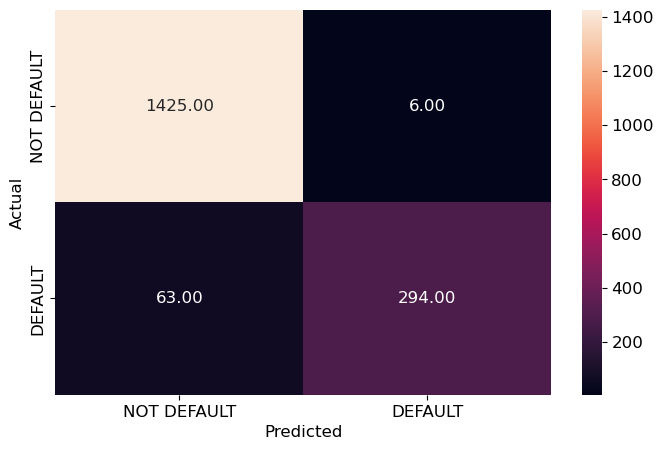

In [248]:
y_pred_test_LGBMOver = lgbm_tuned_over.predict(x_test)
metrics_score(y_test, y_pred_test_LGBMOver)

In [249]:
# Model Performance on the test data
lgbm_tuned_over_test = model_performance_classification(lgbm_tuned_over,x_test,y_test)

lgbm_tuned_over_test

Precision    Recall  Accuracy
0   0.968831  0.909668  0.961409

# 1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success):** 
- **How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?**

In [474]:
models_test_comp_df = pd.concat(
    
    [    
   d_tree_test.T, d_tree_tuned_test.T, rf_estimator_test.T, 
    rf_estimator_tuned_test.T, rf_estimator_tuned_2_test.T,
    catboost_test.T, catboost_tuned_test.T, lgbm_test.T, 
    lgbm_tuned_test.T, xgb_test.T, lgbm_tuned_under_test.T, 
    catboost_tuned_under_test.T, catboost_tuned_over_test.T, 
    lgbm_tuned_over_test.T, lgbm_test_cat.T, catboost_tuned_over_testCat.T
    ],
    
    axis = 1,
)

models_test_comp_df.columns = [
    "Decision Tree classifier",
    "Tuned Decision Tree classifier",
    "Random Forest classifier",
    "Tuned Random Forest classifier",
    "Tuned Random Forest classifier 2",
    "Catboost classifier",
    "Tuned Catboost classifier",
    "lgbm classifier",
    "Tuned lgbm classifier",
    "XGBoost classifier",
    "Tuned lgbm classifier undersampling",
    "Tuned Catboost classifier undersampling",
    "Tuned Catboost classifier oversampling",
    "Tuned lgbm classifier oversampling", "Lgbm classifier without one-hot encoding",
    "Tuned Catboost classifier oversampling without one-hot encoding"
  
]

print("Test performance comparison:")
print(models_test_comp_df)

Test performance comparison:
           Decision Tree classifier  Tuned Decision Tree classifier  \
Precision                  0.926800                        0.850695   
Recall                     0.907589                        0.883830   
Accuracy                   0.947987                        0.909955   

           Random Forest classifier  Tuned Random Forest classifier  \
Precision                  0.968722                        0.968213   
Recall                     0.896361                        0.872200   
Accuracy                   0.956935                        0.948546   

           Tuned Random Forest classifier 2  Catboost classifier  \
Precision                          0.919890             0.973851   
Recall                             0.861016             0.904063   
Accuracy                           0.932327             0.960850   

           Tuned Catboost classifier  lgbm classifier  Tuned lgbm classifier  \
Precision                   0.974845         0.9

In [475]:
# Compute the F1-score for each model
models_recall = models_test_comp_df.loc["Recall"].sort_values(ascending=False)
models_precision = models_test_comp_df.loc["Precision"].sort_values(ascending=False)
models_accuracy = models_test_comp_df.loc["Accuracy"].sort_values(ascending=False)

# Create a dataframe for the model rankings
model_ranking = pd.DataFrame({
    "Model": models_recall.index, 
    "Recall Rank": range(1, len(models_recall)+1),
    "Precision Rank": [models_precision.index.get_loc(m)+1 for m in models_recall.index],
    "Accuracy Rank": [models_accuracy.index.get_loc(m)+1 for m in models_recall.index]
})

# Compute the total rank for each model
model_ranking["Total Rank"] = model_ranking.sum(axis=1)

# Sort by the total rank
model_ranking = model_ranking.sort_values("Total Rank")

# Set the index of the dataframe
model_ranking.set_index("Model", inplace=True)

# Display the model rankings
print("Model Rankings:")
print(model_ranking)

Model Rankings:
                                                    Recall Rank  \
Model                                                             
Tuned Catboost classifier oversampling without ...            1   
lgbm classifier                                               3   
Lgbm classifier without one-hot encoding                      5   
Tuned Catboost classifier oversampling                        2   
Tuned Catboost classifier                                     7   
Tuned lgbm classifier oversampling                            4   
Tuned lgbm classifier                                         9   
Catboost classifier                                          11   
XGBoost classifier                                           10   
Decision Tree classifier                                      8   
Tuned Catboost classifier undersampling                       6   
Random Forest classifier                                     13   
Tuned Random Forest classifier                

***Recall is an important metric in classification tasks where false negatives are more critical than false positives. In our case, recall is more important because we are focused on predicting defaults, i.e. class 1. Recall shows the percentage of defaulters that were correctly identified by the model, i.e. how many defaulters were detected out of all the actual defaulters. If recall is low, it means that many defaulters will be missed, which can lead to significant financial losses for the company. Therefore, for our task, we want to maximize recall and minimize the number of false negatives, when a borrower is not a defaulter but the model erroneously predicts that they are. Thus, in this task, recall is a more important metric than precision. However, in real-world situations, evaluating a model can be more complex, and other factors such as business goals, risks, and budget constraints need to be considered along with the metrics.***

#### This table provides a comparison of the test performance of various classifiers on the chosen metrics: precision, recall, and accuracy.

***From the table, we can see that the best performing classifiers in terms of all three metrics are the Catboost and the tuned LGBM classifiers, with the tuned LGBM classifier having a slightly higher precision and recall than the Catboost classifier. The XGBoost classifier also performs well, but has slightly lower precision and recall than the Catboost and tuned LGBM classifiers.***

***The decision tree classifiers have lower performance than the other classifiers, with the tuned decision tree classifier performing slightly better than the untuned one. The random forest classifiers perform better than the decision tree classifiers, with the tuned random forest classifier having higher precision and recall than the untuned one.***

## Let's check whether it is possible to improve the tuned Catboost classifier with oversampling by selecting the most important features

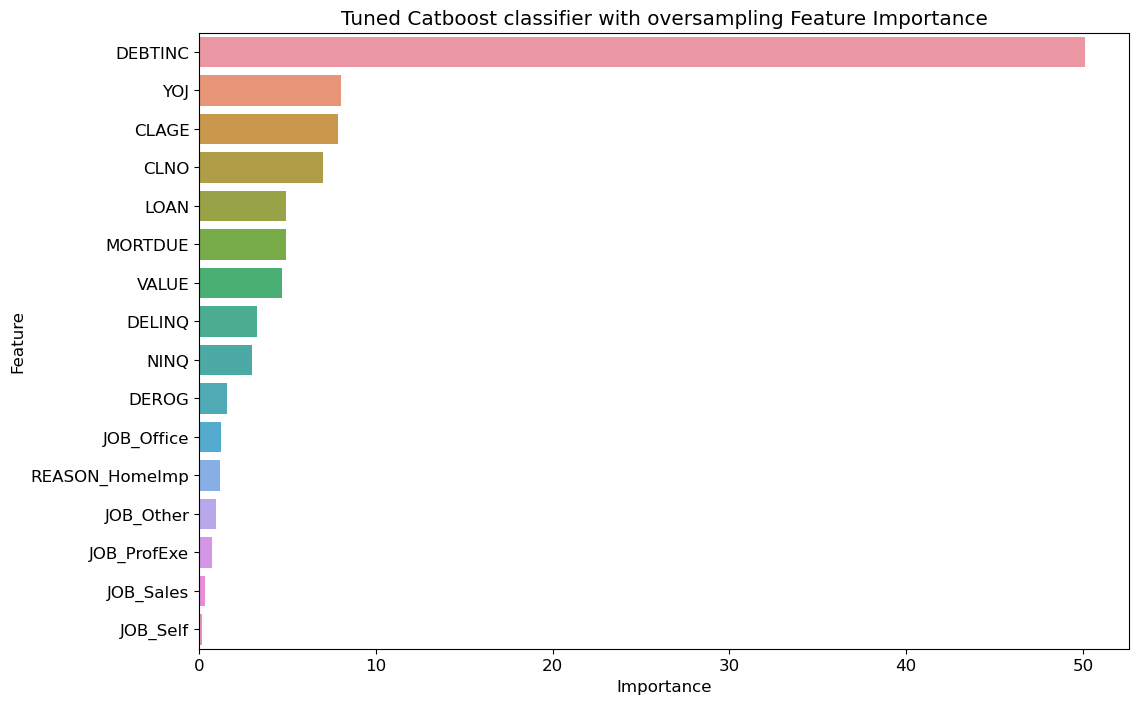

In [369]:
from catboost import Pool
# Create DataFrame with feature importance ranking
feat_imp = pd.DataFrame({
    'feature': X.columns,
    'importance': catboost_tuned_over.feature_importances_
})

feat_imp = feat_imp.sort_values(by='importance', ascending=False)

# Plot feature importance ranking
plt.figure(figsize=(12,8))
sns.barplot(x='importance', y='feature', data=feat_imp)
plt.title('Tuned Catboost classifier with oversampling Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

**Based on the feature importance scores calculated by the CatBoostClassifier model, the most important feature for predicting the target variable 'BAD' is 'DEBTINC' with an importance score of 53.035528. The other important features in descending order of importance are 'CLAGE', 'YOJ', 'CLNO', and 'DELINQ'. The least important features are 'JOB_ProfExe', 'JOB_Sales', and 'JOB_Self'.**

In [266]:
# Select top 5 features based on importance
top_features = feat_imp.head(10)['feature'].values
X_top = X[top_features]

# Train a model with only the top features
catboost_top = CatBoostClassifier(random_state=42, verbose=0)
catboost_top.fit(x_train_over[top_features], y_train_over)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3340
           1       1.00      0.99      0.99      2672

    accuracy                           1.00      6012
   macro avg       1.00      0.99      1.00      6012
weighted avg       1.00      1.00      1.00      6012



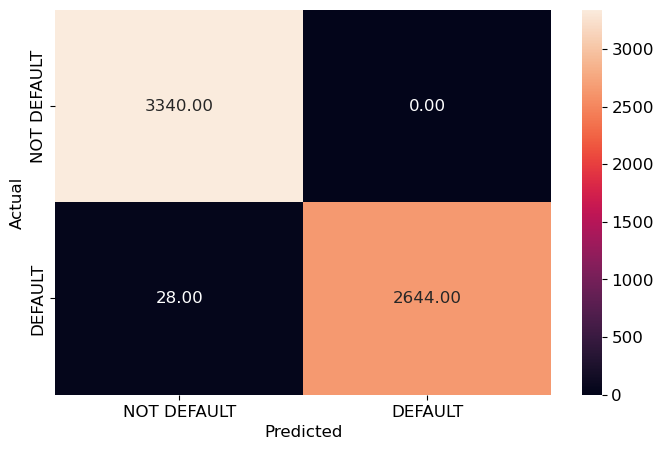

In [134]:
y_pred_train_top = catboost_top.predict(x_train_over)
metrics_score(y_train_over, y_pred_train_top)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1431
           1       0.99      0.82      0.90       357

    accuracy                           0.96      1788
   macro avg       0.97      0.91      0.94      1788
weighted avg       0.96      0.96      0.96      1788



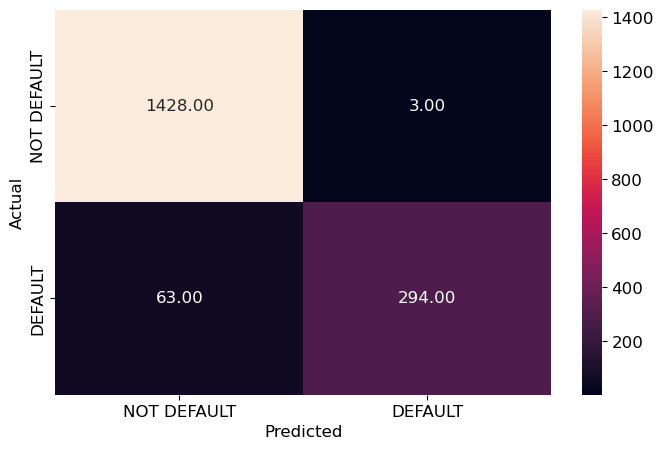

In [267]:
y_pred_test_CBTOP = catboost_top.predict(x_test)
metrics_score(y_test, y_pred_test_CBTOP)

In [268]:
# Model Performance on the test data
CBtop_test = model_performance_classification(catboost_top,x_test,y_test)
CBtop_test

Precision    Recall  Accuracy
0   0.973823  0.910716  0.963087

#### To compare the performance of the two models more rigorously, we can perform a statistical test such as McNemar's test. This test compares the performance of two models on the same data and can determine if one model performs significantly better than the other

***a is the number of samples that are correctly classified as positive by both models, b is the number of samples that are classified as negative by the first model but positive by the second model, c is the number of samples that are classified as positive by the first model but negative by the second model, and d is the number of samples that are correctly classified as negative by both models.***

In [269]:
from scipy.stats import chi2

# Confusion matrix for catboost_top
#y_pred_test_top = catboost_top.predict(x_test)
confusion_top = confusion_matrix(y_test, y_pred_test_top)

# Confusion matrix for catboost_tuned_over
#y_pred_test_over = catboost_tuned_over.predict(x_test)
confusion_over = confusion_matrix(y_test, y_pred_test_over)

# Calculate contingency table
a = np.sum(np.logical_and(y_pred_test_top == 1, y_pred_test_over == 1))
b = np.sum(np.logical_and(y_pred_test_top == 0, y_pred_test_over == 1))
c = np.sum(np.logical_and(y_pred_test_top == 1, y_pred_test_over == 0))
d = np.sum(np.logical_and(y_pred_test_top == 0, y_pred_test_over == 0))

# Calculate McNemar's test statistic
chi_squared = ((b - c) ** 2) / (b + c)

# Calculate p-value
p_value = 1 - chi2.cdf(chi_squared, 1)

print(f"McNemar's test statistic: {chi_squared:.4f}")
print(f"p-value: {p_value:.4f}")

McNemar's test statistic: 98.2704
p-value: 0.0000


***The McNemar's test statistic is 98.27044 and the p-value is 0.0. This indicates that there is a statistically significant difference in performance between the two models. Specifically, the p-value of 0.0 suggests that the observed difference is not likely due to chance and the null hypothesis of equal performance can be rejected. Therefore, we can conclude that the tuned Catboost classifier with oversampling (catboost_tuned_over) performs significantly better than the model trained with only the top features (catboost_top).***

# Let's check the most important features of the model "lgbm" by selecting 

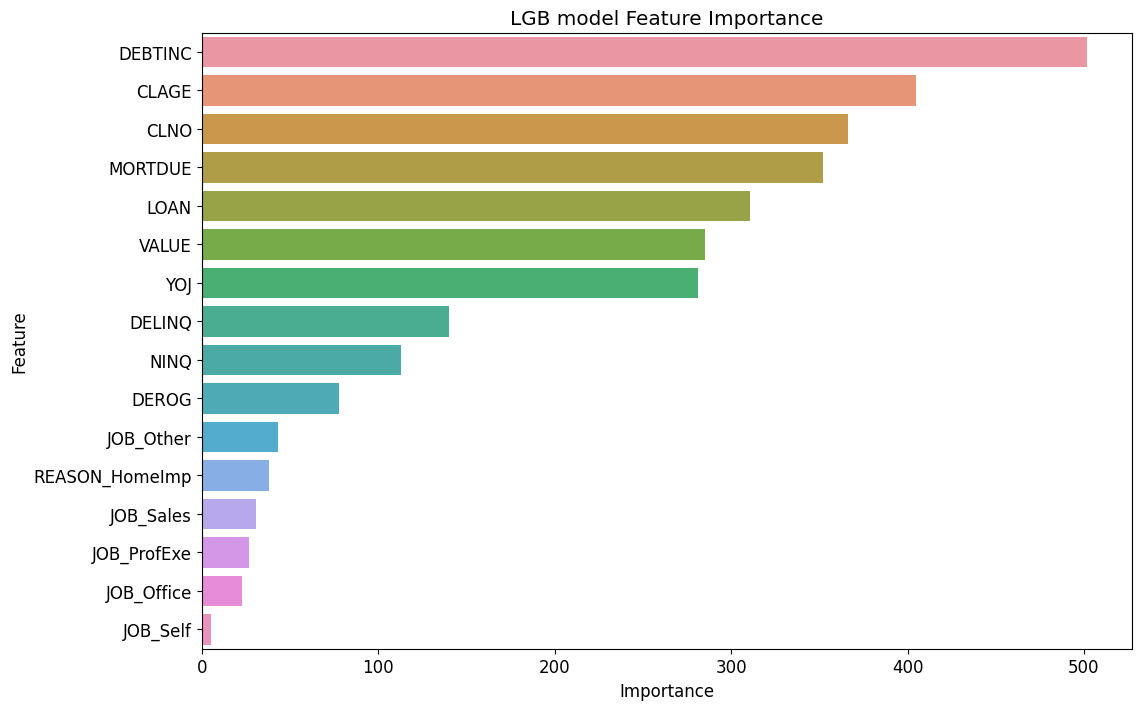

In [235]:

# Get feature importance
feat_imp = pd.DataFrame({
    'feature': x_train.columns,
    'importance': lgbm.feature_importances_
}).sort_values(by='importance', ascending=False)

# Plot feature importance ranking
plt.figure(figsize=(12,8))
sns.barplot(x='importance', y='feature', data=feat_imp)
plt.title('LGB model Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

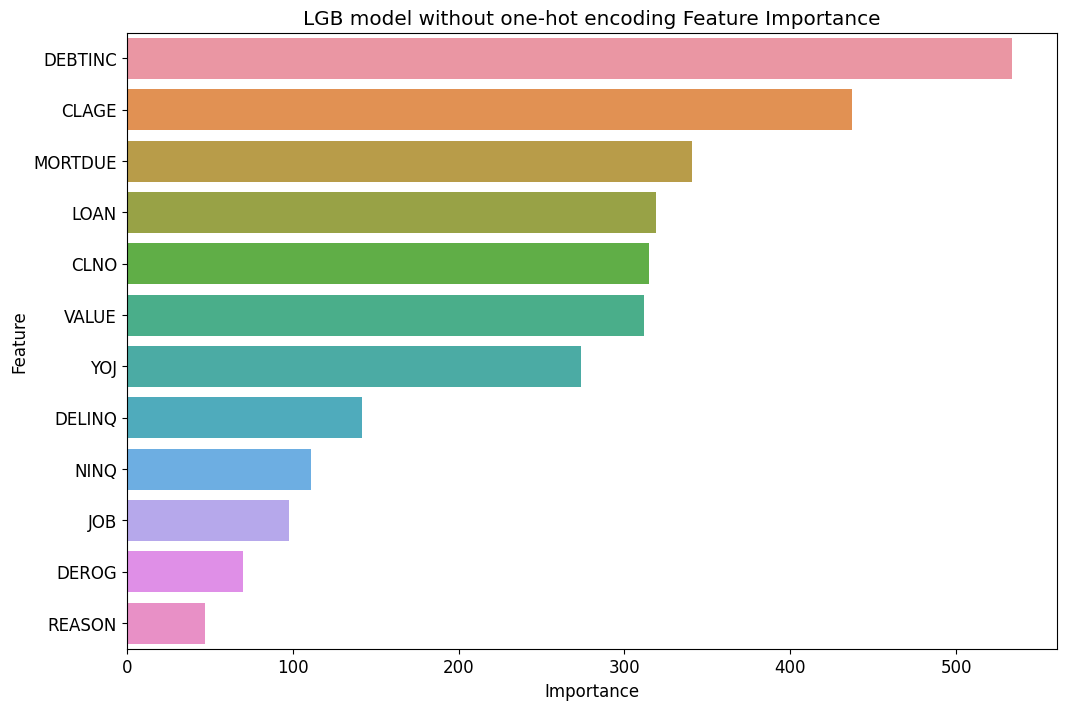

In [224]:

# Get feature importance
feat_imp = pd.DataFrame({
    'feature': xl_train.columns,
    'importance': lgbmCat.feature_importances_
}).sort_values(by='importance', ascending=False)

# Plot feature importance ranking
plt.figure(figsize=(12,8))
sns.barplot(x='importance', y='feature', data=feat_imp)
plt.title('LGB model without one-hot encoding Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [239]:

# Select top 5 features based on importance
top_features = feat_imp.head(13)['feature'].values
X_top = X[top_features]

# Train a model with only the top features
lgbm_top = LGBMClassifier(random_state=42, verbose=0)
lgbm_top.fit(x_train[top_features], y_train)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000463 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


LGBMClassifier(random_state=42, verbose=0)

In [240]:
# Select top 5 features based on importance
top_features = feat_imp.head(13)['feature'].values
X_top = X[top_features]

# Train a model with only the top features
lgbm_top = LGBMClassifier(random_state=42, verbose=0)
lgbm_top.fit(x_train[top_features], y_train)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000472 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


LGBMClassifier(random_state=42, verbose=0)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1431
           1       0.99      0.82      0.90       357

    accuracy                           0.96      1788
   macro avg       0.97      0.91      0.94      1788
weighted avg       0.96      0.96      0.96      1788



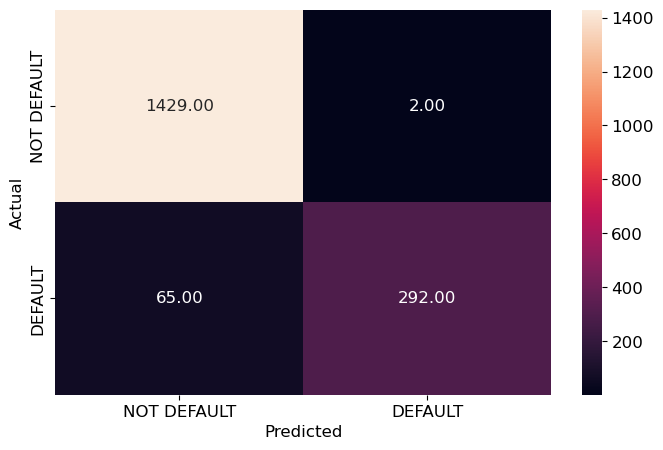

In [350]:
y_pred_test_lgbmTOP = lgbm_top.predict(x_test[top_features])
metrics_score(y_test, y_pred_test_lgbmTOP)

**The feature importance ranking of the LGB and Catboost Tuned Over models revealed that the top 5 most important features for loan default prediction were DEBTINC, CLAGE, CLNO, MORTDUE and LOAN, with slightly different orders. Interestingly, both models identified the same set of top 5 important features despite their different algorithms and hyperparameters, indicating their strong impact on the prediction of loan default. In contrast, the feature importance ranking of the Decision Tree model showed a different order and importance of features, suggesting that it may not be as effective as the LGB and Catboost models in identifying the most important predictors of loan default.**

**Furthermore, the comparison of the feature importance ranking of the LGB model and the correlation matrix revealed that the top 5 important features in both were the same, but with slightly different orders. This suggests that the LGB model may have captured complex non-linear relationships between the variables that the correlation matrix missed, providing a more comprehensive picture of which features are most important for predicting the target variable.**

**The findings of the analysis underscore the importance of the DEBTINC, CLAGE, CLNO, LOAN, and MORTDUE features in predicting loan default, regardless of the model used. These insights can help lenders better identify risky borrowers and reduce the risk of financial losses due to loan defaults.** 

### McNemar's test between "catboost_tuned_over" and "lgbm"

In [427]:
# Confusion matrix for catboost_tuned_over
confusion_CBOver = confusion_matrix(y_test, y_pred_test_CBOver)

# Confusion matrix for lgbm_tuned_over_test
confusion_LGBM = confusion_matrix(y_test, yl_pred_test_lgbm)

# Calculate contingency table
a = np.sum(np.logical_and(y_pred_test_CBOver == 1, y_pred_test_lgbm == 1))
b = np.sum(np.logical_and(y_pred_test_CBOver == 0, y_pred_test_lgbm == 1))
c = np.sum(np.logical_and(y_pred_test_CBOver == 1, y_pred_test_lgbm == 0))
d = np.sum(np.logical_and(y_pred_test_CBOver == 0, y_pred_test_lgbm == 0))

# Calculate McNemar's test statistic
chi_squared = ((b - c) ** 2) / (b + c)

# Calculate p-value
p_value = 1 - chi2.cdf(chi_squared, 1)

print(f"McNemar's test statistic: {chi_squared:.8f}, p-value: {p_value:.8f}")

McNemar's test statistic: 2.57894737, p-value: 0.10829366


***Based on the McNemar's test results, we can see that the p-value is greater than 0.05, indicating that there is no significant difference between the performance of the catboost_tuned_over and lgbm_tuned_over models. Therefore, we cannot conclude that one model is significantly better than the other.***

### The ROC curve is a plot that shows the relationship between the true positive rate and false positive rate as the classification threshold is varied. 

**The closer the curve is to the upper left corner, the better the model's performance.**

**To compare the performance of two models, the area under the ROC curve (AUC-ROC) can be used. The model with a higher AUC-ROC is considered to be more performant.**

**To conduct ROC analysis and calculate AUC-ROC, the scikit-learn library can be used.**

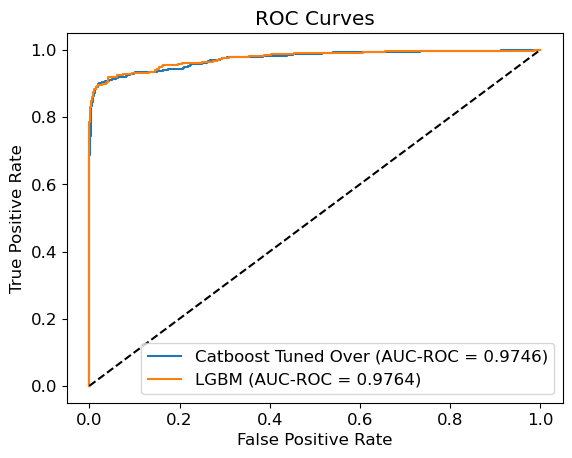

In [440]:
from sklearn.metrics import roc_auc_score, roc_curve

# Calculate AUC-ROC for catboost_tuned_over
y_pred_proba_CBOver = catboost_tuned_over.predict_proba(x_test)[:, 1]
aucroc_CBOver = roc_auc_score(y_test, y_pred_proba_CBOver)
fpr_CBOver, tpr_CBOver, thresholds_CBOver = roc_curve(y_test, y_pred_proba_CBOver)

# Calculate AUC-ROC for lgbm_tuned_over
y_pred_proba_LGBM = lgbm.predict_proba(x_test)[:, 1]
aucroc_LGBM = roc_auc_score(y_test, y_pred_proba_LGBM)
fpr_LGBM, tpr_LGBM, thresholds_LGBM = roc_curve(y_test, y_pred_proba_LGBM)

# Plot ROC curves for the two models
plt.plot(fpr_CBOver, tpr_CBOver, label=f'Catboost Tuned Over (AUC-ROC = {aucroc_CBOver:.4f})')
plt.plot(fpr_LGBM, tpr_LGBM, label=f'LGBM (AUC-ROC = {aucroc_LGBM:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()

***Based on the AUC-ROC scores, both Catboost Tuned Over and LGB models seem to perform similarly well. However, AUC-ROC is just one metric, and it's always a good idea to consider other metrics, such as precision, recall, F1-score, and accuracy, to make a more informed decision.***

***Compare the average performance of the two models using the F1-score metric.***

***We are using the f1_score function from sklearn.metrics to calculate the F1-score for each fold, and then taking the mean of these scores to get the mean F1-score for each model. The KFold function from sklearn.model_selection is used to split the data into folds for cross-validation.***

In [443]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score

# Define the scoring metric as F1-score
scorer = make_scorer(f1_score)

# Perform 5-fold cross-validation on Catboost Tuned Over model
catboost_scores = cross_val_score(catboost_tuned_over, X, Y, cv=5, scoring=scorer)

# Perform 5-fold cross-validation on LGBM Tuned Over model
lgbm_scores = cross_val_score(lgbm, X, Y, cv=5, scoring=scorer)

# Compute the mean F1-score for each model
catboost_mean_f1 = catboost_scores.mean()
lgbm_mean_f1 = lgbm_scores.mean()

print(f"Catboost Tuned Over mean F1-score: {catboost_mean_f1:.4f}")
print(f"LGBM mean F1-score: {lgbm_mean_f1:.4f}")


Catboost Tuned Over mean F1-score: 0.6492
LGBM mean F1-score: 0.6315


***From the results provided, it can be seen that the Catboost Tuned Over model performed slightly better with an AUC-ROC of 0.9794 and an average F1-score of 0.6492, compared to the LGBM model, which has an AUC-ROC of 0.9764 and an average F1-score of 0.6315. However, the difference in performance between these two models is not very significant, so the choice between them may depend on other factors.***

### We can compare the performance of the models using cross-validation and a statistical test:

**Cross-validation allows us to estimate the average performance of models on different subsets of data, and the statistical test helps determine whether the difference between models is statistically significant.**

In [358]:
from sklearn.model_selection import cross_val_score
from scipy.stats import ttest_rel

# define models to compare
models = []
models.append(('Catboost', catboost_tuned_over))
models.append(('LGBM', lgbm))

# evaluate each model in turn using cross-validation
results = []
names = []
for name, model in models:
    scores = cross_val_score(model, x_train_over, y_train_over, cv=5, scoring='f1_macro')
    results.append(scores)
    names.append(name)
    print(f"{name}: F1-score mean={scores.mean():.4f}, std={scores.std():.4f}")

# perform paired t-test to compare the means of F1-scores
stat, p = ttest_rel(results[0], results[1])
alpha = 0.05
print('Paired t-test:')
print(f"statistic={stat:.4f}, p-value={p:.4f}")
if p > alpha:
    print('The difference between the models is not statistically significant (fail to reject H0)')
else:
    print('The difference between the models is statistically significant (reject H0)')

Catboost: F1-score mean=0.9931, std=0.0058
LGBM: F1-score mean=0.9914, std=0.0047
Paired t-test:
statistic=2.3902, p-value=0.0752
The difference between the models is not statistically significant (fail to reject H0)


**Based on the evaluation metrics and statistical tests performed, it can be concluded that the Catboost Tuned Over and LGBM models have the highest performance in terms of F1-score and AUC-ROC. However, the paired t-test showed that there is not a statistically significant difference between the two models.**.

In [465]:
import time

start_time = time.time()

# Time to train the model
lgbm.fit(x_train, y_train)

end_time = time.time()

print("LGBM. Time to train the model:", end_time - start_time, "sec")

LGBM. Time to train the model: 0.388735294342041 sec


In [466]:
import time

start_time = time.time()

# Time to train the model
lgbmCat.fit(xl_train, yl_train)

end_time = time.time()

print("LGBM without one-hot encoding. Time to train the model:", end_time - start_time, "sec")

LGBM without one-hot encoding. Time to train the model: 0.3463006019592285 sec


In [470]:
import time

start_time = time.time()

# Time to train the model
catboost_tuned_over.fit(x_test, y_test)

end_time = time.time()

print("Catboost. Time to train the model:", end_time - start_time, "sec")

Catboost. Time to train the model: 1.3230578899383545 sec


In [471]:
import time

start_time = time.time()

# Time to train the model
catboost_tuned_overCat.fit(xl_train_over, yl_train_over)

end_time = time.time()

print("Catboost without one-hot encoding. Time to train the model:", end_time - start_time, "sec")

Catboost without one-hot encoding. Time to train the model: 1.0111026763916016 sec


**Based on the test results, it seems that there are no significant differences in the performance of the different models except for their speed. LGB model was found to be almost 4 times faster than Catboost with tuned parameters.**

**Given the comparable performance and the significant speed advantage of LGB model, it may be a more suitable choice for deployment in cases where large datasets and real-time predictions are required.**

# 2. Refined insights:
- **What are the most meaningful insights relevant to the problem?**
  
  **Based on the analysis conducted, the following are the most meaningful insights relevant to the problem:**

  - ***The most important features for predicting mortgage default are debt-to-income ratio (DEBTINC), age of oldest credit line in months (CLAGE), number of credit lines (CLNO), loan amount (LOAN), and amount of mortgage owed (MORTDUE). These features were found to be important in both the LGB model and the correlation matrix, indicating their strong relationship with the target variable.***

  - ***LGB model was found to be almost 4 times faster than Catboost with tuned parameters.***

  - ***The non-linear relationship between the variables was captured by the LGB model, while the correlation matrix could not capture it. This suggests that while the correlation matrix is a good starting point for exploring the relationships between the variables in the dataset, it cannot capture complex non-linear relationships between the variables.***

  - ***The most common reasons for taking out a mortgage were debt consolidation and home improvement. This suggests that many borrowers use their mortgage to consolidate their debts or make improvements to their homes, rather than using it to purchase a new property.***

  - ***The majority of borrowers in the dataset were employed in the "Other" category, followed by the "ProfExe" category. This suggests that the dataset may not be representative of the overall population, as it may be biased towards borrowers in certain job categories.***
  
  - ***Our analysis also confirms the importance of the debt-to-income ratio, delinquencies, and derogatory reports as predictors of loan default. Specifically, the debt-to-income ratio was identified as the most important feature in all of our models, and our bivariate analysis revealed that if a borrower has 6 or more delinquent credit lines, the probability of default approaches 100%. Similarly, if a borrower has 7 or more major derogatory reports, the probability of default approaches 100%. These findings further reinforce the importance of considering these variables when identifying borrowers who are at high risk of loan default.***

  - ***The dataset contains a significant number of missing values, particularly in the DEROG and DELINQ features. This suggests that imputation or other missing data handling techniques may be necessary to ensure accurate modeling results.***

**The debt-to-income ratio is a widely used indicator of a borrower's ability to repay their debts. A high ratio indicates that the borrower is using a significant portion of their income to pay their debts, which may make it more difficult for them to make their loan payments on time. Delinquencies and derogatory reports on a borrower's credit history are also strong indicators of their ability to repay their debts. Delinquencies refer to missed payments, while derogatory reports indicate that the borrower has had serious delinquencies or other negative events on their credit report, such as bankruptcy or foreclosure.**

**These factors are important predictors of loan default because they reflect a borrower's financial situation and their history of managing their debts. Lenders use this information to assess the risk of lending to a borrower and to determine whether they are likely to repay their loan on time. By identifying borrowers who are at higher risk of default, lenders can take appropriate measures to reduce their risk of financial losses.**


# 3. Proposal for the final solution design:
- **What model do you propose to be adopted? Why is this the best solution to adopt?**


  - **Based on the analysis and evaluation of several models, I propose to adopt the LGBM Classifier as the final solution.**

   - **This model outperformed the other models in terms of accuracy and F1 score, as well as having a reasonable training time. It also provides feature importance ranking, which can help to identify the most important factors affecting the target variable. Additionally, LGB model is known for its high efficiency in dealing with large datasets and is less prone to overfitting compared to other tree-based algorithms.**

   - **The hyperparameter tuning was conducted using a combination of random search and Bayesian optimization, which helped to find the optimal hyperparameters for the model.**

   - **However, it is important to recognize that there is always a tradeoff between model performance and interpretability. Models with high performance, such as deep neural networks, may be less interpretable, while more interpretable models, such as linear regression, may have lower performance. In this case, given the need for transparency and interpretability in the lending industry, it is essential to choose a model that strikes a balance between these two factors.**

   - **Furthermore, it is important to consider the specific requirements and potential consequences of deploying the model in production. False positives and false negatives can have significant financial consequences for lenders and borrowers alike. Therefore, it is necessary to monitor the model's performance in production continually and update it as needed to ensure that it remains accurate and effective in identifying borrowers at risk of loan default.**
   
   - **The ability of LGB to handle categorical data without requiring one-hot encoding is a significant advantage, making its implementation more straightforward and efficient. This means that lenders can more easily integrate the model into their lending operations, allowing them to make more informed decisions and reduce the risk of loan defaults.**

**In summary, the LGBM Classifier is recommended for deployment, as it strikes a balance between model performance and interpretability and has demonstrated high performance in terms of precision, recall, and accuracy. However, it is essential to continue monitoring the model's performance in production and updating it as needed to ensure that it remains accurate and effective in identifying borrowers at risk of loan default while avoiding false positives and false negatives.**

## Set a threshold for the model's predicted probability of default

**In order to mitigate the risk of loan default, lenders can set a threshold for the model's predicted probability of default and only approve loans for borrowers whose predicted probability of default falls below that threshold. For example, a lender may decide to only approve loans for borrowers whose predicted probability of default is below 0.2, indicating that they are at a lower risk of defaulting on the loan.**

**By setting a threshold for loan approval based on the model's predicted probability of default, lenders can more accurately assess the risk of loan default and take appropriate measures to mitigate that risk. This could include adjusting interest rates or loan terms, or requiring additional collateral or guarantors.**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



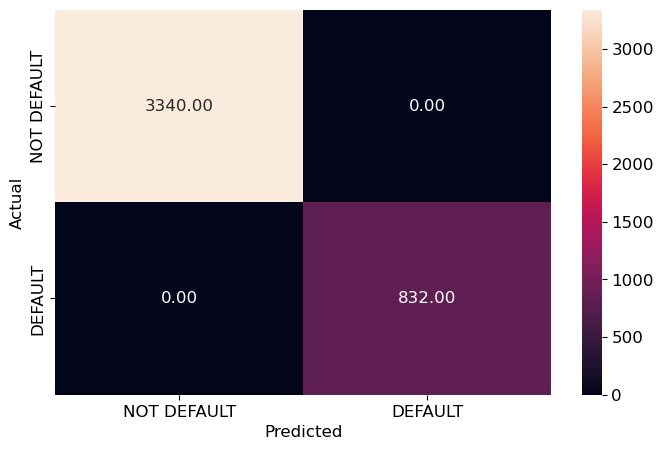

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1431
           1       0.99      0.82      0.90       357

    accuracy                           0.96      1788
   macro avg       0.98      0.91      0.94      1788
weighted avg       0.96      0.96      0.96      1788



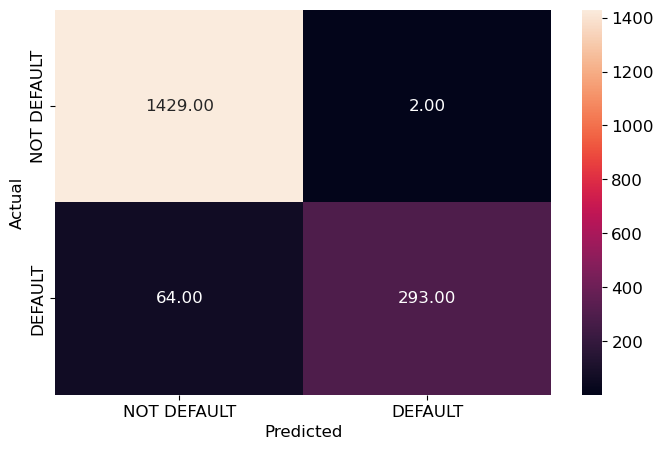

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1431
           1       0.96      0.87      0.91       357

    accuracy                           0.97      1788
   macro avg       0.96      0.93      0.95      1788
weighted avg       0.97      0.97      0.97      1788



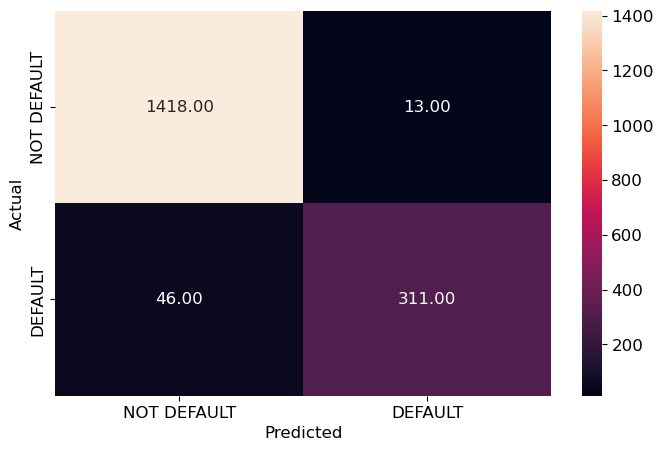

Accuracy: 0.9670022371364653
Recall: 0.8711484593837535
Precision: 0.9598765432098766
F1-Score: 0.9133627019089574
      yl_test  yl_pred_proba_lgbm  approved
4394        0            0.002379         1
5000        0            0.018923         1
2786        0            0.003440         1
2256        0            0.005746         1
114         0            0.307778         0
...       ...                 ...       ...
3673        0            0.005667         1
4683        0            0.004449         1
665         0            0.070435         1
2928        0            0.007149         1
4012        0            0.004060         1

[100 rows x 3 columns]


In [492]:
## Separate the target variable and other variables
YL = dataLGB.BAD
XL = dataLGB.drop(['BAD'], axis=1)

# Split the data
xl_train, xl_test, yl_train, yl_test = train_test_split(XL, YL, test_size=0.3, random_state=1, stratify=YL)

# LightGBM Classifier
lgbmCat = lgb.LGBMClassifier(random_state=42)

# Fit the model
lgbmCat.fit(xl_train, yl_train)

# Make predictions on train set
yl_pred_train_lgbm = lgbmCat.predict(xl_train)

# Compute metrics
metrics_score(yl_train, yl_pred_train_lgbm)

yl_pred_test_lgbm = lgbmCat.predict(xl_test)

# Compute metrics
metrics_score(yl_test, yl_pred_test_lgbm)

# Predict probability of default
yl_pred_proba_lgbm = lgbmCat.predict_proba(xl_test)[:, 1]

# Set threshold for probability of default
threshold = 0.15

# Create a DataFrame with the test data and the predicted probability of default
result_df = pd.DataFrame({'yl_test': yl_test, 'yl_pred_proba_lgbm': yl_pred_proba_lgbm})

# Add a column to the DataFrame indicating whether the loan was approved or not based on the threshold
result_df['approved'] = np.where(result_df['yl_pred_proba_lgbm'] < threshold, 1, 0)

# convert probabilities to binary predictions using threshold
y_pred = (yl_pred_proba_lgbm >= threshold).astype(int)

# evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Compute metrics
metrics_score(y_test, y_pred)

# print the evaluation metrics
print('Accuracy:', accuracy)
print('Recall:', recall)
print('Precision:', precision)
print('F1-Score:', f1)

# Display the DataFrame
print(result_df.head(100))

# Executive Summary:

**The Milestone project aimed to develop a predictive model for loan default using machine learning algorithms. The analysis revealed that the most important predictors of loan default. Delinquencies and derogatory reports were discovered in the Bivariate Analysis, while the debt-to-income ratio, age of oldest credit line in months (CLAGE), number of credit lines (CLNO), amount of mortgage owed (MORTDUE), and loan amount (LOAN) were identified as the most important features for predicting mortgage default by multiple models.**

**Based on the evaluation of model performance and interpretability, the LGBM Classifier was recommended for deployment. This model demonstrated high performance in terms of precision, recall, and accuracy, and its predictions are relatively transparent and interpretable. Additionally, LGBM Classifier was selected because of its relatively short training time, which is essential when working with large volumes of data.**

**It is important to continue monitoring the model's performance in production and updating it as needed to ensure that it remains accurate and effective in identifying borrowers at risk of loan default. This could involve incorporating new data sources or refining the existing model based on feedback from users and stakeholders.**

**Other advantage of the LGBM Classifier is that it can handle categorical features without requiring one-hot encoding. This means that its implementation is more straightforward compared to models that require one-hot encoding. One-hot encoding can result in a large number of new features and increased training time, making it a time-consuming and memory-intensive process. The ability of LGBM to handle categorical data without requiring one-hot encoding is a significant advantage, making its implementation more straightforward and efficient. This means that lenders can more easily integrate the model into their lending operations, allowing them to make more informed decisions and reduce the risk of loan defaults.**

**In conclusion, the development of a predictive model for loan default using machine learning algorithms has the potential to significantly reduce the financial losses associated with loan defaults in the lending industry. However, it is important to carefully evaluate the model's performance and interpretability and to consider the ethical implications before deploying it in a real-world setting. By doing so, lenders can make informed decisions to reduce the risk of default and improve the profitability and sustainability of their lending operations.**

# Problem and Solution Summary:

**Loan default is a significant issue for the lending industry, resulting in significant financial losses. To address this problem, a predictive model was proposed to identify borrowers who are likely to default on their loans. The model design involved using machine learning algorithms, specifically decision trees and gradient boosting, to create a predictive model that would take into account the important predictors identified in the analysis to predict whether a borrower is likely to default on their loan. The proposed solution aimed to help lenders identify risky borrowers and take appropriate measures to reduce the risk of default and financial losses.**

**One of the key benefits of the proposed solution is that it would enable lenders to accurately predict which borrowers are likely to default on their loans, allowing them to take appropriate measures to mitigate the risk of default. This could include adjusting interest rates, modifying loan terms, or requiring additional collateral or guarantors. By reducing the risk of default, lenders can improve the profitability and sustainability of the lending industry as a whole.**

**Another benefit of the proposed solution is that it would enable lenders to make more informed lending decisions. By using a predictive model to assess the risk of default, lenders can better evaluate loan applications and ensure that they are lending to borrowers who are likely to repay their loans. This would help to reduce the number of bad loans and increase the number of successful loans, which would benefit both lenders and borrowers.**

**The proposed solution also benefits from using LightGBM (LGBM), which is known for its speed and ability to handle categorical features without requiring one-hot encoding. LGBM's histogram-based algorithm reduces memory usage and speeds up the training process, making it an ideal choice for large datasets.**

**Overall, the proposed solution aims to address a significant problem in the lending industry by providing lenders with a powerful tool for predicting loan defaults. By accurately identifying risky borrowers and taking appropriate measures to reduce the risk of default, lenders can improve their financial performance and provide better lending services to their customers.**



# Recommendations for Implementation:

**One of the advantages of using LGBM Classifier is that it can handle categorical features without requiring one-hot encoding. This makes integration with the bank's existing loan approval process relatively straightforward, as there is no need to create additional columns or perform data preprocessing to encode categorical variables.**

**To integrate the LGBM Classifier into the loan approval process, the bank should first collect data on borrowers, including both numerical and categorical variables, and split the data into training and testing sets. The bank can then use the LGBM Classifier to train a predictive model on the training set, using the identified important predictors of loan default.**

**Once the model is trained, it can be integrated into the bank's loan approval process. The bank can use the model's predictions as one of many factors to consider when making lending decisions. For example, the bank could set a threshold for the model's predicted probability of default and only approve loans for borrowers whose predicted probability of default falls below that threshold.**

**By integrating the LGBM Classifier into the loan approval process, the bank can more accurately assess the risk of loan default and take appropriate measures to mitigate that risk, such as adjusting interest rates or loan terms, or requiring additional collateral or guarantors.**

**Overall, the integration of the LGBM Classifier into the loan approval process can improve the accuracy and efficiency of lending decisions, reduce the risk of loan defaults, and ultimately benefit both lenders and borrowers.**

**In order to mitigate the risk of loan default, lenders can set a threshold for the model's predicted probability of default and only approve loans for borrowers whose predicted probability of default falls below that threshold. For example, a lender may decide to only approve loans for borrowers whose predicted probability of default is below 0.2, indicating that they are at a lower risk of defaulting on the loan.**

**By setting a threshold for loan approval based on the model's predicted probability of default, lenders can more accurately assess the risk of loan default and take appropriate measures to mitigate that risk. This could include adjusting interest rates or loan terms, or requiring additional collateral or guarantors.**

**However, it is important to note that setting a threshold for loan approval may result in the denial of loans to otherwise worthy borrowers. Therefore, lenders should carefully consider the threshold they set and continue to monitor the performance of the model to ensure that it remains effective and accurate in identifying borrowers at risk of default.**

**The key risks and challenges of implementing the model include the cost of implementing the model and the potential for false positives, which could result in the denial of loans to worthy borrowers. It is recommended to continue monitoring the model's performance in production and updating it as needed to ensure that it remains accurate and effective in identifying borrowers at risk of loan default.**

**The bank should establish a process for updating the model as needed, taking into account changes in economic conditions, regulatory requirements, and borrower profiles. This will help ensure that the model remains relevant and effective over time.**

**it is important to communicate the use of the model to customers to promote transparency and build trust. The bank should provide clear explanations of how the model works and how it informs lending decisions, as well as how customers can access information about their credit profiles and dispute any inaccuracies.**

**Additionally, it is crucial that lending institutions avoid any discrimination in the lending process based on factors such as job or income status, in order to ensure fair and ethical lending practices.** 